In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR, SVC, LinearSVC
import statsmodels.api as sm
from sklearn.svm import NuSVC
import sklearn
from sklearn.utils import estimator_html_repr
sklearn.set_config(display='diagram')

In [2]:
def keyRegressionMetrics(y_true,y_preds):
    from sklearn import metrics
    explainedVarianceScore=metrics.explained_variance_score(y_true,y_preds)
    medianAbsoluteError=metrics.median_absolute_error(y_true,y_preds)
    rootMeanSquaredError=metrics.mean_squared_error(y_true,y_preds,squared=False)
    maxError=metrics.max_error(y_true,y_preds)
    #meanSquaredLogError=metrics.mean_squared_log_error(y_true,y_preds)
    R_Sqrd=metrics.r2_score(y_true,y_preds)
    
    return print('explained_variance_score:',explainedVarianceScore,'\nmedian_absolute_error:',medianAbsoluteError,\
                 '\nroot_mean_squared_error:',rootMeanSquaredError,'\nmax_error:',maxError) #,'\nmean_squared_log_error:',\
                 #meanSquaredLogError,'\nR_Sqrd:',R_Sqrd)

In [3]:
df=pd.read_csv('../datasets/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

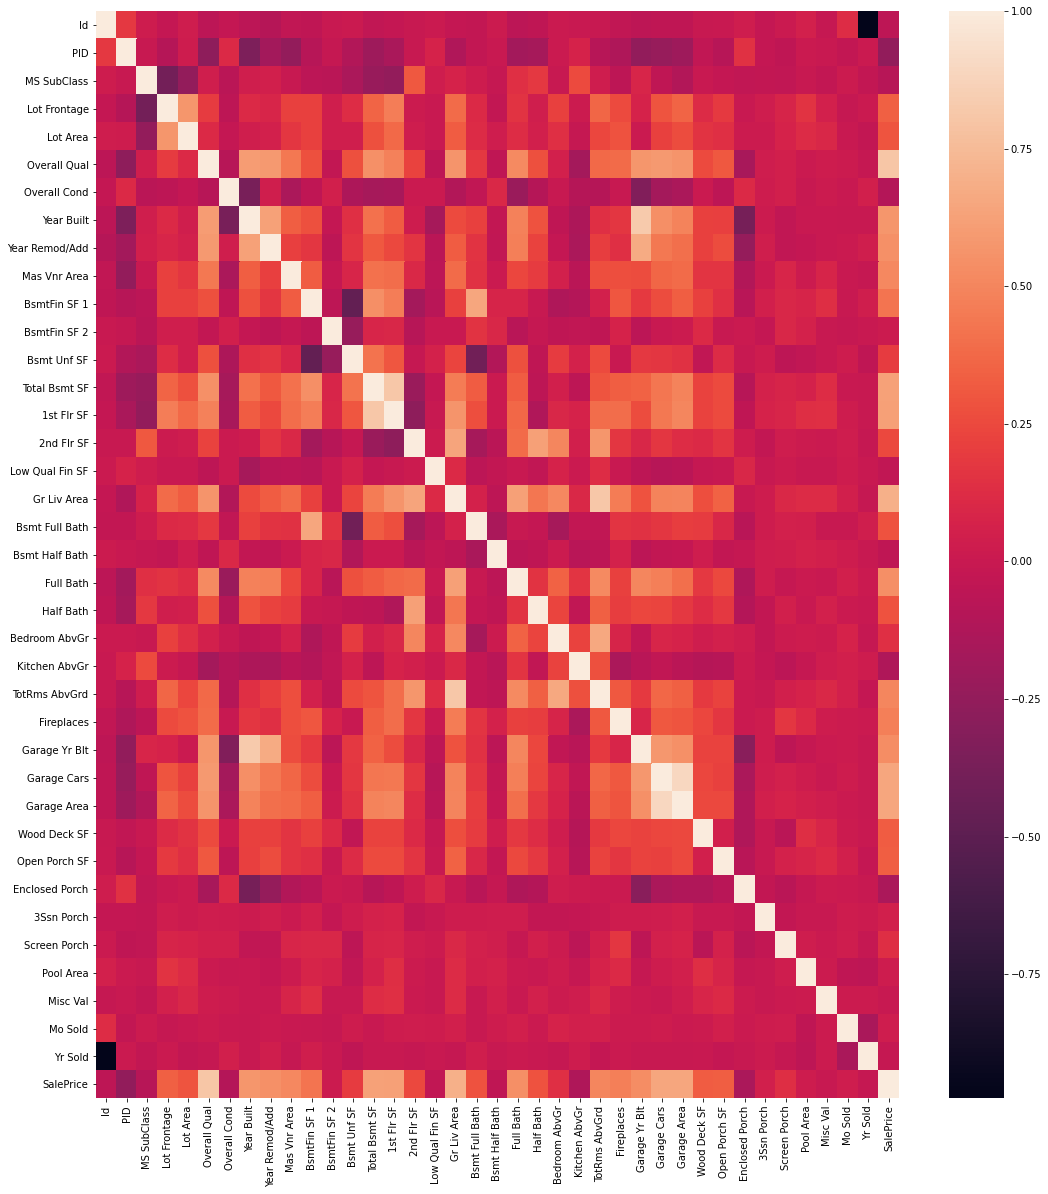

In [7]:
ax=sns.heatmap(df.drop(['Alley','Pool QC','Fence','Misc Feature'],axis=1).corr())
plt.rcParams["figure.figsize"] = (20,24)

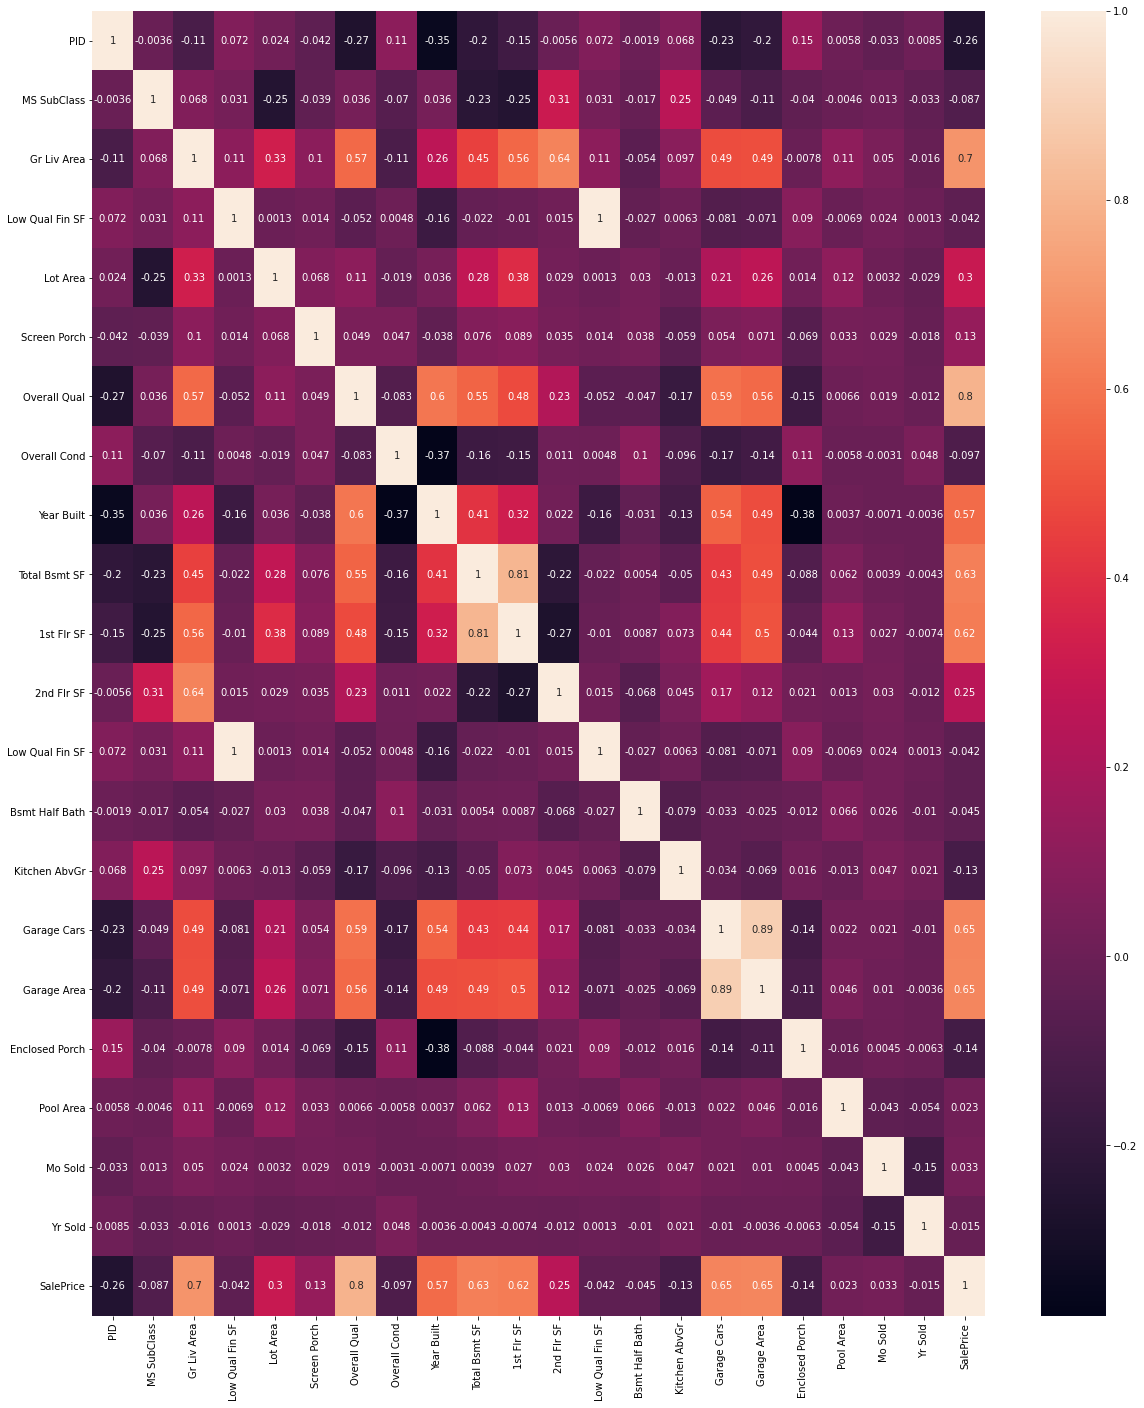

In [8]:
sns.heatmap(df[['PID','MS SubClass','Gr Liv Area','Low Qual Fin SF','Lot Area','Screen Porch','Overall Qual','Overall Cond','Year Built','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Bsmt Half Bath','Kitchen AbvGr','Garage Cars','Garage Area','Enclosed Porch','Pool Area','Mo Sold','Yr Sold','SalePrice']].corr(),annot=True)
plt.rcParams["figure.figsize"] = (18,20)

In [9]:
#taking out MS SubClass
df_initial_list=df[['PID','Gr Liv Area','Lot Area','Screen Porch','Overall Qual','Overall Cond','Year Built','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Bsmt Half Bath','Kitchen AbvGr','Garage Cars','Garage Area','Enclosed Porch','Pool Area','Mo Sold','Yr Sold','Neighborhood','SalePrice']]

In [10]:
df_initial_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   Gr Liv Area      2051 non-null   int64  
 2   Lot Area         2051 non-null   int64  
 3   Screen Porch     2051 non-null   int64  
 4   Overall Qual     2051 non-null   int64  
 5   Overall Cond     2051 non-null   int64  
 6   Year Built       2051 non-null   int64  
 7   Total Bsmt SF    2050 non-null   float64
 8   1st Flr SF       2051 non-null   int64  
 9   2nd Flr SF       2051 non-null   int64  
 10  Low Qual Fin SF  2051 non-null   int64  
 11  Bsmt Half Bath   2049 non-null   float64
 12  Kitchen AbvGr    2051 non-null   int64  
 13  Garage Cars      2050 non-null   float64
 14  Garage Area      2050 non-null   float64
 15  Enclosed Porch   2051 non-null   int64  
 16  Pool Area        2051 non-null   int64  
 17  Mo Sold       

In [11]:
df_initial_list.dropna(inplace=True)

<ipython-input-11-ea31feb58575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial_list.dropna(inplace=True)


In [12]:
df_initial_list.head()

PID  Gr Liv Area  Lot Area  Screen Porch  Overall Qual  Overall Cond  \
0  533352170         1479     13517             0             6             8   
1  531379050         2122     11492             0             7             5   
2  535304180         1057      7922             0             5             7   
3  916386060         1444      9802             0             5             5   
4  906425045         1445     14235             0             6             8   

   Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  ...  Bsmt Half Bath  \
0        1976          725.0         725         754  ...             0.0   
1        1996          913.0         913        1209  ...             0.0   
2        1953         1057.0        1057           0  ...             0.0   
3        2006          384.0         744         700  ...             0.0   
4        1900          676.0         831         614  ...             0.0   

   Kitchen AbvGr  Garage Cars  Garage Area  Enclosed Porch  Pool Area  \
0              1          2.0        475.0               0          0   
1              1          2.0        559.0               0          0   
2              1          1.0        246.0               0          0   
3              1          2.0        400.0               0          0   
4              1          2.0        484.0               0          0   

   Mo Sold  Yr Sold  Neighborhood SalePrice  
0        3     2010        Sawyer    130500  
1        4     2009       SawyerW    220000  
2        1     2010         NAmes    109000  
3        4     2010        Timber    174000  
4        3     2010       SawyerW    138500  

[5 rows x 21 columns]

In [13]:
nBasket=pd.DataFrame(df_initial_list.groupby(by='Neighborhood').median()['SalePrice'])
nBasket.head()

SalePrice
Neighborhood           
Blmngtn        192250.0
Blueste        137500.0
BrDale         105500.0
BrkSide        128000.0
ClearCr        225000.0

In [14]:
nBasket.dtypes

SalePrice    float64
dtype: object

In [15]:
nBasket['Basket']=round((nBasket['SalePrice']-nBasket['SalePrice'].mean())/nBasket['SalePrice'].std(),2)

In [16]:
Z=dict(nBasket['Basket'])

In [17]:
Z

{'Blmngtn': 0.13,
 'Blueste': -0.7,
 'BrDale': -1.19,
 'BrkSide': -0.85,
 'ClearCr': 0.63,
 'CollgCr': 0.25,
 'Crawfor': 0.24,
 'Edwards': -0.9,
 'Gilbert': -0.04,
 'Greens': 0.1,
 'GrnHill': 1.47,
 'IDOTRR': -1.25,
 'Landmrk': -0.71,
 'MeadowV': -1.39,
 'Mitchel': -0.36,
 'NAmes': -0.65,
 'NPkVill': -0.62,
 'NWAmes': 0.02,
 'NoRidge': 1.79,
 'NridgHt': 2.04,
 'OldTown': -0.97,
 'SWISU': -0.72,
 'Sawyer': -0.74,
 'SawyerW': -0.04,
 'Somerst': 0.62,
 'StoneBr': 2.12,
 'Timber': 0.56,
 'Veenker': 1.17}

In [18]:
df_initial_list['Neighborhood Basket']=np.nan
#for i in df_initial_list['Neighborhood']:0
for j in range(len(df_initial_list['Neighborhood'])):
    df_initial_list.iloc[j,21]=float(Z[df_initial_list['Neighborhood'].iloc[j]])

<ipython-input-18-10cbb9f3fac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial_list['Neighborhood Basket']=np.nan
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [19]:
df_initial_list.drop('Neighborhood',axis=1,inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


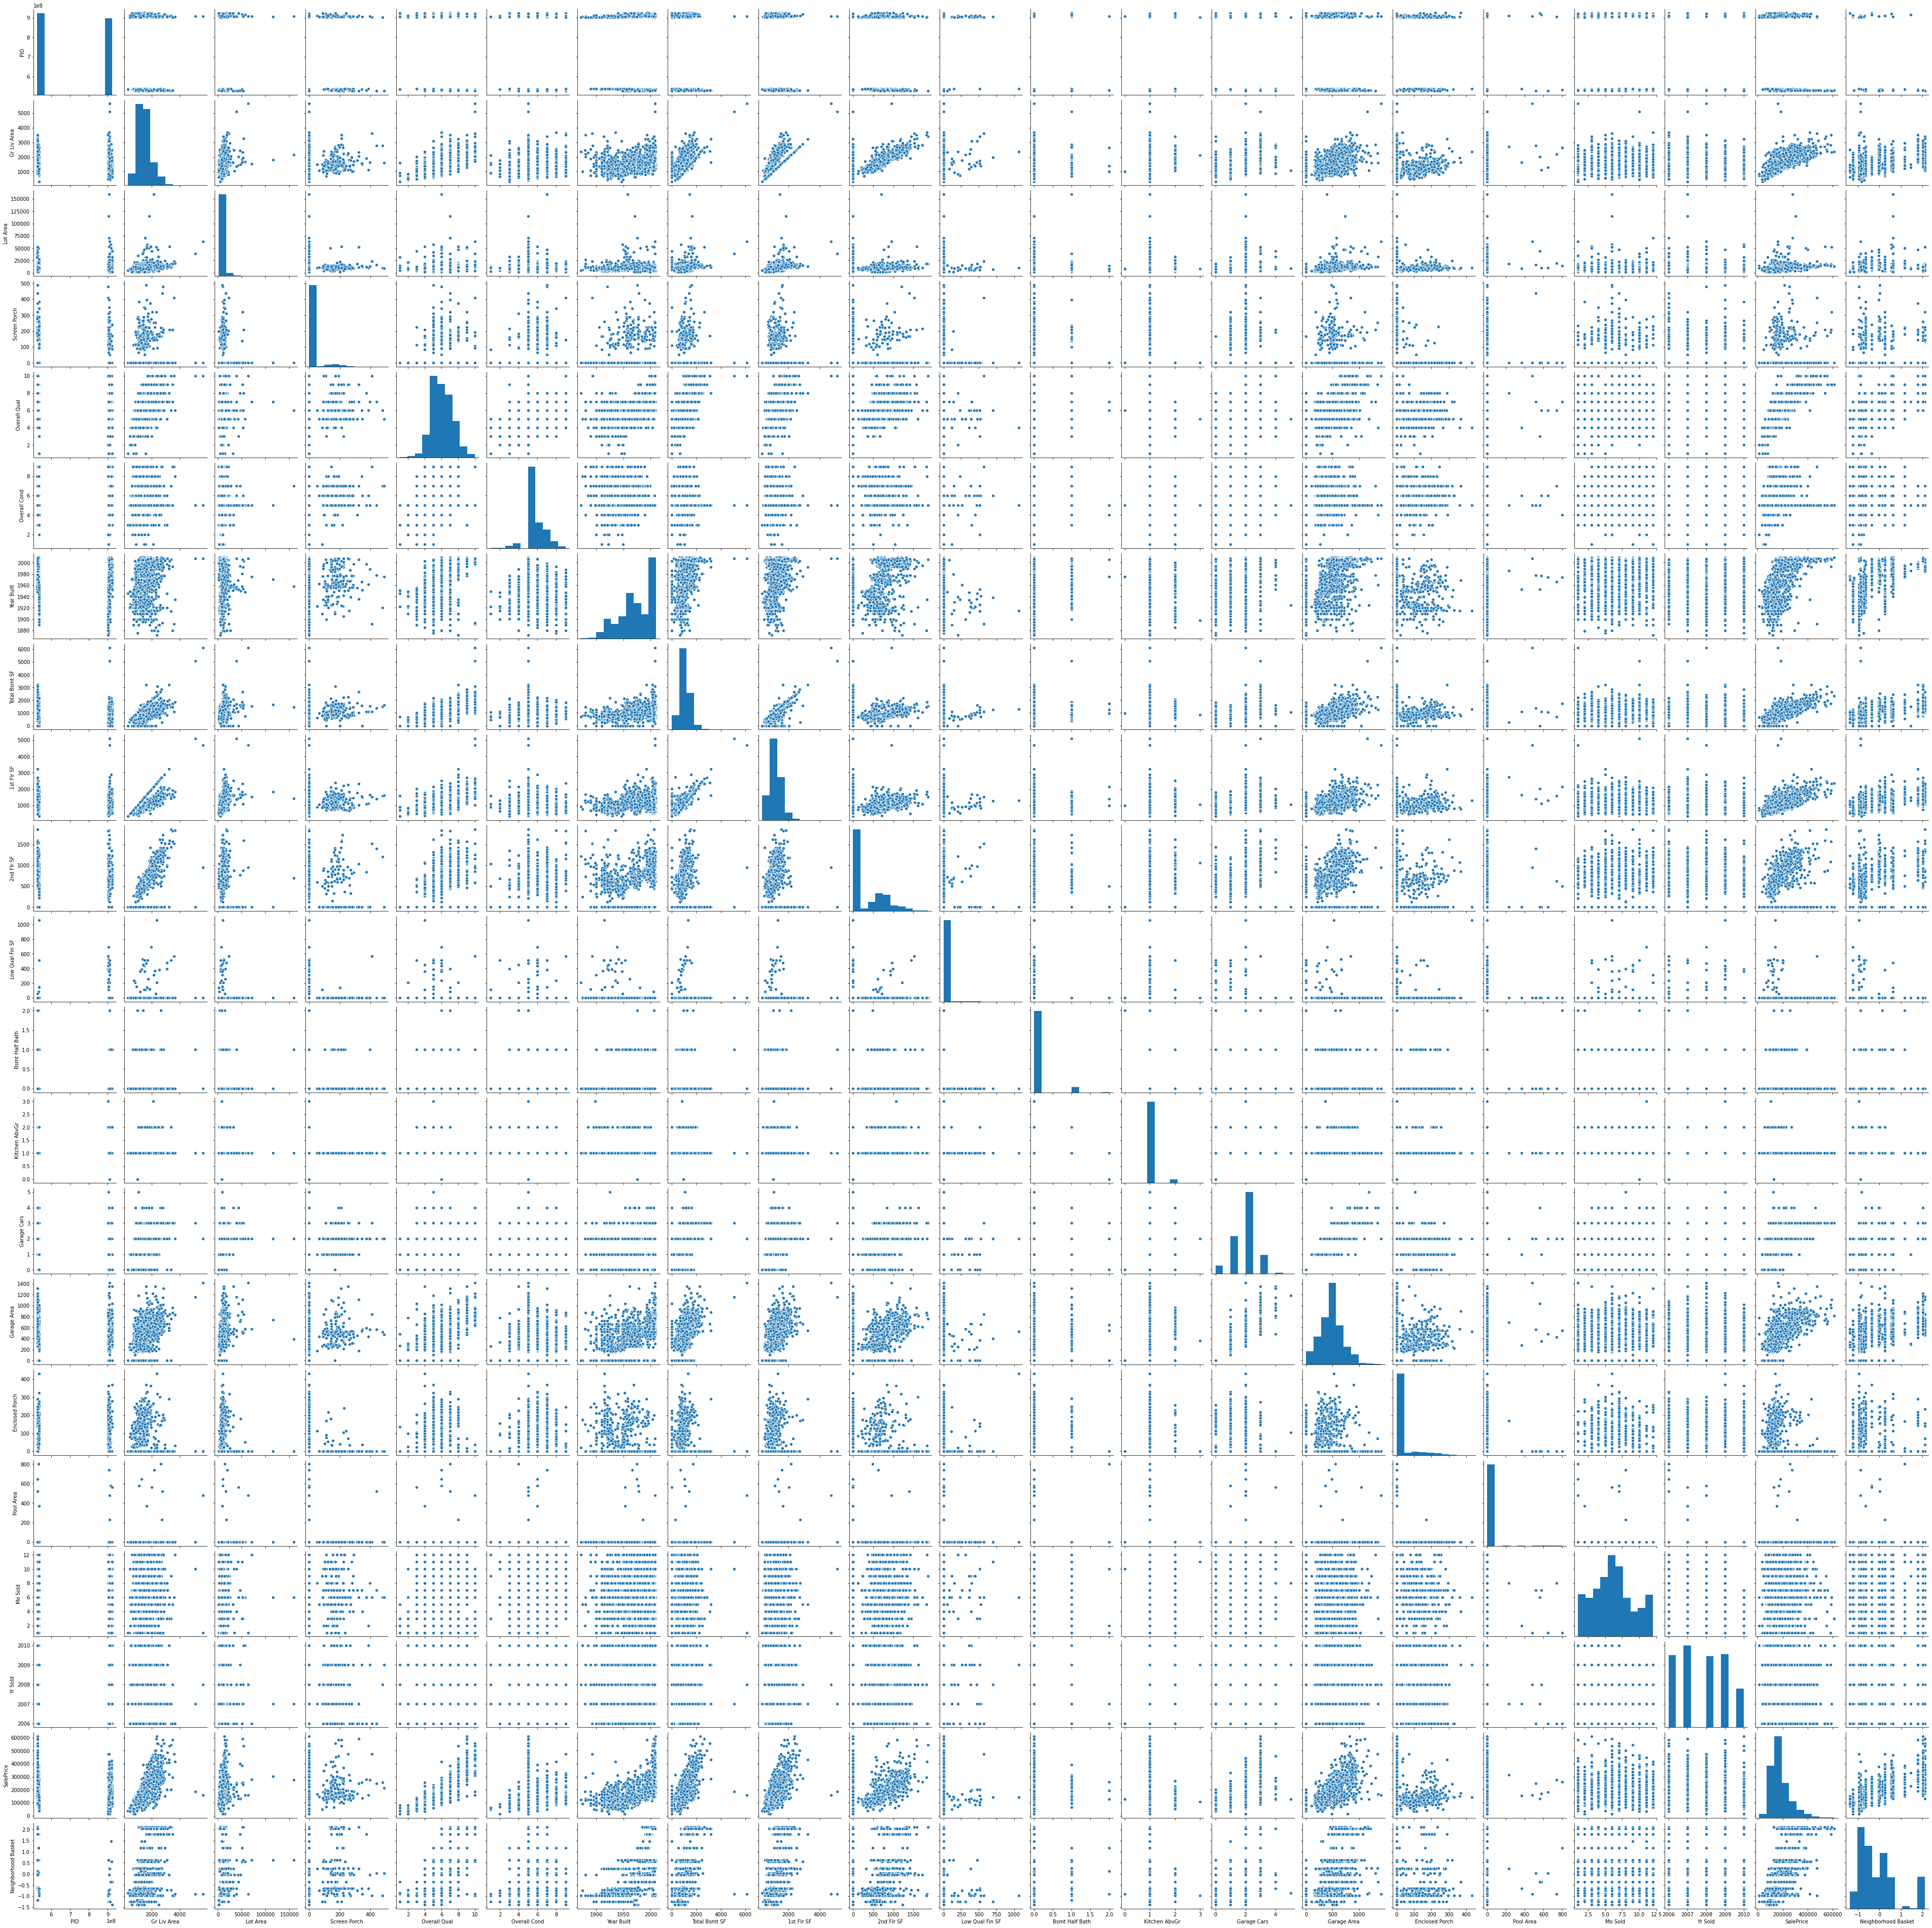

In [20]:
sns.pairplot(df_initial_list)

In [21]:
df_initial_list.describe()

PID  Gr Liv Area       Lot Area  Screen Porch  Overall Qual  \
count  2.048000e+03  2048.000000    2048.000000   2048.000000   2048.000000   
mean   7.133064e+08  1498.331055   10049.675293     16.535645      6.114258   
std    1.886843e+08   497.948344    6697.167566     57.412746      1.426126   
min    5.263011e+08   334.000000    1300.000000      0.000000      1.000000   
25%    5.284581e+08  1129.500000    7500.000000      0.000000      5.000000   
50%    5.354532e+08  1444.000000    9432.000000      0.000000      6.000000   
75%    9.071770e+08  1728.000000   11512.750000      0.000000      7.000000   
max    9.241520e+08  5642.000000  159000.000000    490.000000     10.000000   

       Overall Cond   Year Built  Total Bsmt SF   1st Flr SF   2nd Flr SF  \
count   2048.000000  2048.000000    2048.000000  2048.000000  2048.000000   
mean       5.560547  1971.751465    1058.601562  1163.431152   329.378906   
std        1.104349    30.174112     448.999749   392.294626   425.680677   
min        1.000000  1872.000000       0.000000   334.000000     0.000000   
25%        5.000000  1954.000000     793.000000   879.000000     0.000000   
50%        5.000000  1974.000000     995.500000  1093.000000     0.000000   
75%        6.000000  2001.000000    1319.000000  1405.000000   691.750000   
max        9.000000  2010.000000    6110.000000  5095.000000  1862.000000   

       ...  Bsmt Half Bath  Kitchen AbvGr  Garage Cars  Garage Area  \
count  ...     2048.000000    2048.000000  2048.000000  2048.000000   
mean   ...        0.063477       1.042969     1.776855   473.692871   
std    ...        0.251763       0.209937     0.764702   215.972053   
min    ...        0.000000       0.000000     0.000000     0.000000   
25%    ...        0.000000       1.000000     1.000000   319.000000   
50%    ...        0.000000       1.000000     2.000000   480.000000   
75%    ...        0.000000       1.000000     2.000000   576.000000   
max    ...        2.000000       3.000000     5.000000  1418.000000   

       Enclosed Porch    Pool Area      Mo Sold      Yr Sold      SalePrice  \
count     2048.000000  2048.000000  2048.000000  2048.000000    2048.000000   
mean        22.501465     2.401367     6.222168  2007.775879  181484.252441   
std         59.738209    37.810135     2.745331     1.312844   79248.657891   
min          0.000000     0.000000     1.000000  2006.000000   12789.000000   
25%          0.000000     0.000000     4.000000  2007.000000  129837.500000   
50%          0.000000     0.000000     6.000000  2008.000000  162500.000000   
75%          0.000000     0.000000     8.000000  2009.000000  214000.000000   
max        432.000000   800.000000    12.000000  2010.000000  611657.000000   

       Neighborhood Basket  
count          2048.000000  
mean             -0.107803  
std               0.900249  
min              -1.390000  
25%              -0.740000  
50%              -0.360000  
75%               0.250000  
max               2.120000  

[8 rows x 21 columns]

In [22]:
df_initial_list

PID  Gr Liv Area  Lot Area  Screen Porch  Overall Qual  \
0     533352170         1479     13517             0             6   
1     531379050         2122     11492             0             7   
2     535304180         1057      7922             0             5   
3     916386060         1444      9802             0             5   
4     906425045         1445     14235             0             6   
...         ...          ...       ...           ...           ...   
2046  921126030         1728     11449             0             8   
2047  905377130          861     12342             0             4   
2048  909253010         1913      7558             0             6   
2049  535179160         1200     10400             0             4   
2050  527162130         1804      7500             0             7   

      Overall Cond  Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  ...  \
0                8        1976          725.0         725         754  ...   
1                5        1996          913.0         913        1209  ...   
2                7        1953         1057.0        1057           0  ...   
3                5        2006          384.0         744         700  ...   
4                8        1900          676.0         831         614  ...   
...            ...         ...            ...         ...         ...  ...   
2046             5        2007         1884.0        1728           0  ...   
2047             5        1940          861.0         861           0  ...   
2048             6        1928          896.0        1172         741  ...   
2049             5        1956         1200.0        1200           0  ...   
2050             5        1999          994.0        1028         776  ...   

      Bsmt Half Bath  Kitchen AbvGr  Garage Cars  Garage Area  Enclosed Porch  \
0                0.0              1          2.0        475.0               0   
1                0.0              1          2.0        559.0               0   
2                0.0              1          1.0        246.0               0   
3                0.0              1          2.0        400.0               0   
4                0.0              1          2.0        484.0               0   
...              ...            ...          ...          ...             ...   
2046             0.0              1          2.0        520.0               0   
2047             0.0              1          2.0        539.0               0   
2048             0.0              1          2.0        342.0               0   
2049             0.0              1          1.0        294.0             140   
2050             0.0              1          2.0        442.0               0   

      Pool Area  Mo Sold  Yr Sold  SalePrice  Neighborhood Basket  
0             0        3     2010     130500                -0.74  
1             0        4     2009     220000                -0.04  
2             0        1     2010     109000                -0.65  
3             0        4     2010     174000                 0.56  
4             0        3     2010     138500                -0.04  
...         ...      ...      ...        ...                  ...  
2046          0        1     2008     298751                 0.56  
2047          0        3     2009      82500                -0.90  
2048          0        3     2009     177000                 0.24  
2049          0       11     2009     144000                -0.65  
2050          0        6     2010     189000                -0.04  

[2048 rows x 21 columns]

In [23]:
means=df_initial_list.describe().iloc[1]
means=pd.DataFrame(means)
means.reset_index(inplace=True)
means

index          mean
0                   PID  7.133064e+08
1           Gr Liv Area  1.498331e+03
2              Lot Area  1.004968e+04
3          Screen Porch  1.653564e+01
4          Overall Qual  6.114258e+00
5          Overall Cond  5.560547e+00
6            Year Built  1.971751e+03
7         Total Bsmt SF  1.058602e+03
8            1st Flr SF  1.163431e+03
9            2nd Flr SF  3.293789e+02
10      Low Qual Fin SF  5.520996e+00
11       Bsmt Half Bath  6.347656e-02
12        Kitchen AbvGr  1.042969e+00
13          Garage Cars  1.776855e+00
14          Garage Area  4.736929e+02
15       Enclosed Porch  2.250146e+01
16            Pool Area  2.401367e+00
17              Mo Sold  6.222168e+00
18              Yr Sold  2.007776e+03
19            SalePrice  1.814843e+05
20  Neighborhood Basket -1.078027e-01

In [24]:
stdDev=df_initial_list.describe().iloc[2]
stdDev=pd.DataFrame(stdDev)
stdDev.reset_index(inplace=True)
stdDev

index           std
0                   PID  1.886843e+08
1           Gr Liv Area  4.979483e+02
2              Lot Area  6.697168e+03
3          Screen Porch  5.741275e+01
4          Overall Qual  1.426126e+00
5          Overall Cond  1.104349e+00
6            Year Built  3.017411e+01
7         Total Bsmt SF  4.489997e+02
8            1st Flr SF  3.922946e+02
9            2nd Flr SF  4.256807e+02
10      Low Qual Fin SF  5.110584e+01
11       Bsmt Half Bath  2.517628e-01
12        Kitchen AbvGr  2.099372e-01
13          Garage Cars  7.647022e-01
14          Garage Area  2.159721e+02
15       Enclosed Porch  5.973821e+01
16            Pool Area  3.781013e+01
17              Mo Sold  2.745331e+00
18              Yr Sold  1.312844e+00
19            SalePrice  7.924866e+04
20  Neighborhood Basket  9.002490e-01

In [25]:
featureRange=pd.merge(means,stdDev,left_on='index',right_on='index')

In [26]:
featureRange

index          mean           std
0                   PID  7.133064e+08  1.886843e+08
1           Gr Liv Area  1.498331e+03  4.979483e+02
2              Lot Area  1.004968e+04  6.697168e+03
3          Screen Porch  1.653564e+01  5.741275e+01
4          Overall Qual  6.114258e+00  1.426126e+00
5          Overall Cond  5.560547e+00  1.104349e+00
6            Year Built  1.971751e+03  3.017411e+01
7         Total Bsmt SF  1.058602e+03  4.489997e+02
8            1st Flr SF  1.163431e+03  3.922946e+02
9            2nd Flr SF  3.293789e+02  4.256807e+02
10      Low Qual Fin SF  5.520996e+00  5.110584e+01
11       Bsmt Half Bath  6.347656e-02  2.517628e-01
12        Kitchen AbvGr  1.042969e+00  2.099372e-01
13          Garage Cars  1.776855e+00  7.647022e-01
14          Garage Area  4.736929e+02  2.159721e+02
15       Enclosed Porch  2.250146e+01  5.973821e+01
16            Pool Area  2.401367e+00  3.781013e+01
17              Mo Sold  6.222168e+00  2.745331e+00
18              Yr Sold  2.007776e+03  1.312844e+00
19            SalePrice  1.814843e+05  7.924866e+04
20  Neighborhood Basket -1.078027e-01  9.002490e-01

In [27]:
featureRange=featureRange.T

In [28]:
header=featureRange.iloc[0]
featureRange.columns=header

In [29]:
featureRange.drop('index',axis=0,inplace=True)

In [30]:
featureRange.columns.name=None

In [31]:
featureRange

PID Gr Liv Area Lot Area Screen Porch Overall Qual Overall Cond  \
mean  7.13306e+08     1498.33  10049.7      16.5356      6.11426      5.56055   
std   1.88684e+08     497.948  6697.17      57.4127      1.42613      1.10435   

     Year Built Total Bsmt SF 1st Flr SF 2nd Flr SF  ... Bsmt Half Bath  \
mean    1971.75        1058.6    1163.43    329.379  ...      0.0634766   
std     30.1741           449    392.295    425.681  ...       0.251763   

     Kitchen AbvGr Garage Cars Garage Area Enclosed Porch Pool Area  Mo Sold  \
mean       1.04297     1.77686     473.693        22.5015   2.40137  6.22217   
std       0.209937    0.764702     215.972        59.7382   37.8101  2.74533   

      Yr Sold SalePrice Neighborhood Basket  
mean  2007.78    181484           -0.107803  
std   1.31284   79248.7            0.900249  

[2 rows x 21 columns]

In [32]:
df_initial_list

PID  Gr Liv Area  Lot Area  Screen Porch  Overall Qual  \
0     533352170         1479     13517             0             6   
1     531379050         2122     11492             0             7   
2     535304180         1057      7922             0             5   
3     916386060         1444      9802             0             5   
4     906425045         1445     14235             0             6   
...         ...          ...       ...           ...           ...   
2046  921126030         1728     11449             0             8   
2047  905377130          861     12342             0             4   
2048  909253010         1913      7558             0             6   
2049  535179160         1200     10400             0             4   
2050  527162130         1804      7500             0             7   

      Overall Cond  Year Built  Total Bsmt SF  1st Flr SF  2nd Flr SF  ...  \
0                8        1976          725.0         725         754  ...   
1                5        1996          913.0         913        1209  ...   
2                7        1953         1057.0        1057           0  ...   
3                5        2006          384.0         744         700  ...   
4                8        1900          676.0         831         614  ...   
...            ...         ...            ...         ...         ...  ...   
2046             5        2007         1884.0        1728           0  ...   
2047             5        1940          861.0         861           0  ...   
2048             6        1928          896.0        1172         741  ...   
2049             5        1956         1200.0        1200           0  ...   
2050             5        1999          994.0        1028         776  ...   

      Bsmt Half Bath  Kitchen AbvGr  Garage Cars  Garage Area  Enclosed Porch  \
0                0.0              1          2.0        475.0               0   
1                0.0              1          2.0        559.0               0   
2                0.0              1          1.0        246.0               0   
3                0.0              1          2.0        400.0               0   
4                0.0              1          2.0        484.0               0   
...              ...            ...          ...          ...             ...   
2046             0.0              1          2.0        520.0               0   
2047             0.0              1          2.0        539.0               0   
2048             0.0              1          2.0        342.0               0   
2049             0.0              1          1.0        294.0             140   
2050             0.0              1          2.0        442.0               0   

      Pool Area  Mo Sold  Yr Sold  SalePrice  Neighborhood Basket  
0             0        3     2010     130500                -0.74  
1             0        4     2009     220000                -0.04  
2             0        1     2010     109000                -0.65  
3             0        4     2010     174000                 0.56  
4             0        3     2010     138500                -0.04  
...         ...      ...      ...        ...                  ...  
2046          0        1     2008     298751                 0.56  
2047          0        3     2009      82500                -0.90  
2048          0        3     2009     177000                 0.24  
2049          0       11     2009     144000                -0.65  
2050          0        6     2010     189000                -0.04  

[2048 rows x 21 columns]

Let's take a closer look at the relationship between 'Screen Porch' and 'Enclosed Porch'.

In [33]:
df_initial_list[['Screen Porch','Enclosed Porch']].corr()

Screen Porch  Enclosed Porch
Screen Porch        1.000000       -0.068888
Enclosed Porch     -0.068888        1.000000

In [34]:
df_initial_list[(df_initial_list['Screen Porch']==1)&(df_initial_list['Screen Porch']==1)]

Empty DataFrame
Columns: [PID, Gr Liv Area, Lot Area, Screen Porch, Overall Qual, Overall Cond, Year Built, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Bsmt Half Bath, Kitchen AbvGr, Garage Cars, Garage Area, Enclosed Porch, Pool Area, Mo Sold, Yr Sold, SalePrice, Neighborhood Basket]
Index: []

[0 rows x 21 columns]

These two features do no co-occur in the dataset.

In [35]:
df_initial_list['Porch']=df_initial_list['Screen Porch']+df_initial_list['Enclosed Porch']
df_initial_list.drop(['Screen Porch','Enclosed Porch'],axis=1,inplace=True)

<ipython-input-35-c45b52fc9407>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial_list['Porch']=df_initial_list['Screen Porch']+df_initial_list['Enclosed Porch']
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df_initial_list['Floor Space/Lot Area']=(df_initial_list['1st Flr SF']+ df_initial_list['2nd Flr SF']+df_initial_list['Total Bsmt SF'])/df_initial_list['Lot Area']

<ipython-input-36-6289c505fefb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial_list['Floor Space/Lot Area']=(df_initial_list['1st Flr SF']+ df_initial_list['2nd Flr SF']+df_initial_list['Total Bsmt SF'])/df_initial_list['Lot Area']


Taking out: test_data['house type']=test_data['MS SubClass']*test_data['Floor Space/Lot Area']

In [37]:
X=df_initial_list.drop('SalePrice',axis=1)
X.columns.values

array(['PID', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Bsmt Half Bath', 'Kitchen AbvGr',
       'Garage Cars', 'Garage Area', 'Pool Area', 'Mo Sold', 'Yr Sold',
       'Neighborhood Basket', 'Porch', 'Floor Space/Lot Area'],
      dtype=object)

In [38]:
y=df_initial_list['SalePrice']

In [40]:
selection_pipe=make_pipeline(StandardScaler(),SelectKBest(k=12))

In [41]:
selection_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=12))])

In [42]:
with open('../images/selection_pipe.html', 'w') as f:
    f.write(estimator_html_repr(selection_pipe))

In [43]:
selection_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func'])

In [44]:
params={
    'selectkbest__k':[10,11,12,13,14,15,16,17,18,19,20],
    'selectkbest__score_func':['f_regression'] #,'mutual_info_regression']
}

In [45]:
selection_pipe.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=12))])

In [46]:
selection_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=12))])>

In [47]:
selection_pipe.named_steps.selectkbest.get_params()

{'k': 12,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [48]:
feature_names=selection_pipe.named_steps['selectkbest']

In [49]:
feature_names.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False])

In [50]:
X.columns

Index(['PID', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Garage Cars',
       'Garage Area', 'Pool Area', 'Mo Sold', 'Yr Sold', 'Neighborhood Basket',
       'Porch', 'Floor Space/Lot Area'],
      dtype='object')

In [51]:
#Feature names selected by FeatureSelection

np.array(X.columns)[feature_names.get_support()]

array(['Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Kitchen AbvGr', 'Garage Cars', 'Garage Area',
       'Neighborhood Basket'], dtype=object)

In [52]:
#Re-defining X to include only selected set of features.
X=X[np.array(X.columns)[feature_names.get_support()]]

We are done with feature selection and at this stage it would be interesting to look at how the features are correlated.

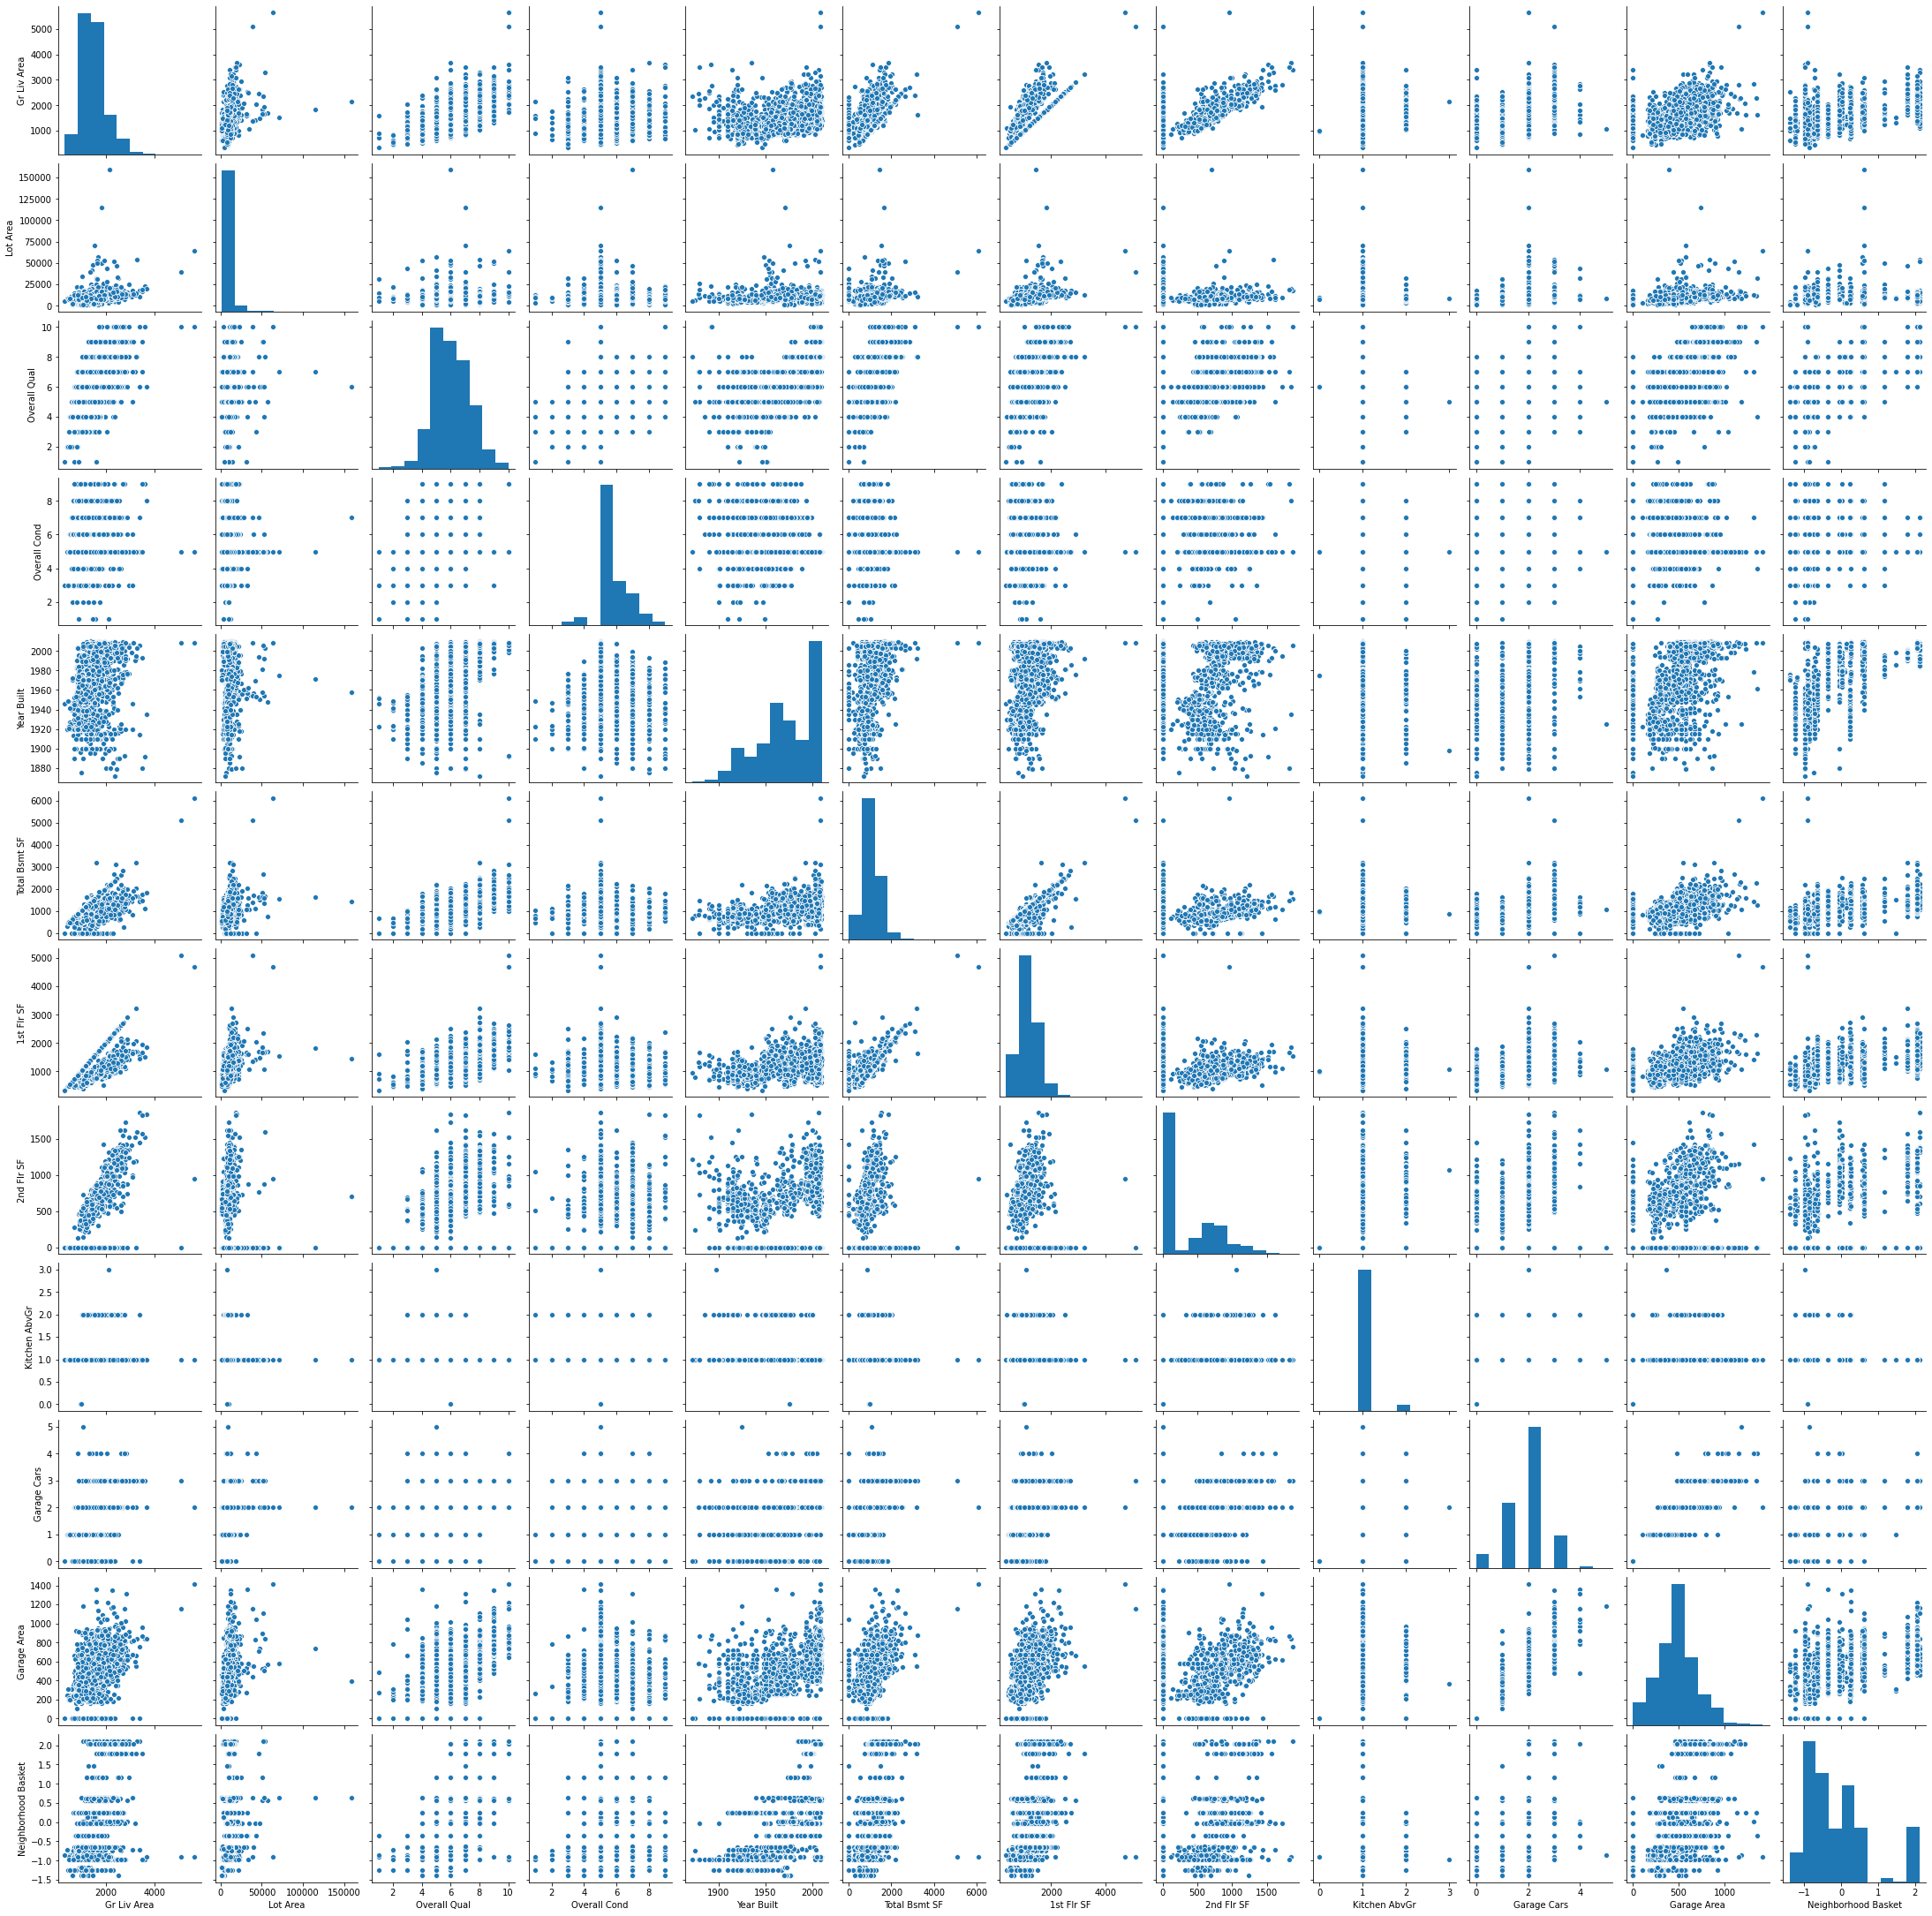

In [53]:
sns.pairplot(df_initial_list[X.columns])
plt.savefig('../images/pair_plot_features_and_SalePrice.png')

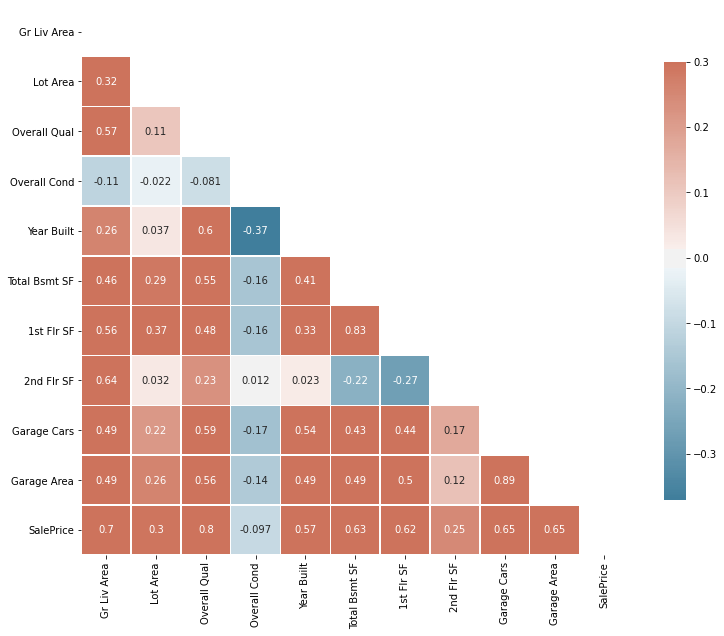

In [54]:
corr=df_initial_list[['Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond',\
       'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',\
       'Garage Cars', 'Garage Area','SalePrice']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},annot=True);
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('../images/selected_features_heatmap.png')

Let's split X and y into train and test split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [56]:
model_pipe=make_pipeline(StandardScaler(),Ridge())

In [57]:
model_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [58]:
params1={
    'ridge__alpha':[0.001,0.01,0.1,1,10,100,500,1000,10000],
    'ridge__solver':['svd','cholesky','lsqr','saga']
    #'lasso__fit_intercept':[True,False],
}

In [59]:
gs=GridSearchCV(model_pipe,params1,cv=11,n_jobs=-1)

In [60]:
gs.fit(X_train,y_train)

GridSearchCV(cv=11,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500,
                                          1000, 10000],
                         'ridge__solver': ['svd', 'cholesky', 'lsqr', 'saga']})

In [61]:
ridgeCoeffs=gs.best_estimator_.named_steps['ridge']

In [62]:
ridgeCoeffs.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=100, solver='saga')>

In [63]:
ridgeCoeffs.coef_

array([12816.81549078,  3685.61070457, 19710.07922491,  5778.97212766,
        5916.40292791,  6671.60527455, 10504.2800348 ,  6324.92380609,
       -4248.97911267,  4162.67032505,  5335.00125766, 21702.677974  ])

In [64]:
X_train.columns

Index(['Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Kitchen AbvGr',
       'Garage Cars', 'Garage Area', 'Neighborhood Basket'],
      dtype='object')

In [65]:
df_ridge_coefs=pd.DataFrame({'names':X_train.columns,'coefs':ridgeCoeffs.coef_}).sort_values(by='coefs',ascending=False)
df_ridge_coefs.reset_index(inplace=True)
df_ridge_coefs.drop('index',axis=1,inplace=True)
df_ridge_coefs

names         coefs
0   Neighborhood Basket  21702.677974
1          Overall Qual  19710.079225
2           Gr Liv Area  12816.815491
3            1st Flr SF  10504.280035
4         Total Bsmt SF   6671.605275
5            2nd Flr SF   6324.923806
6            Year Built   5916.402928
7          Overall Cond   5778.972128
8           Garage Area   5335.001258
9           Garage Cars   4162.670325
10             Lot Area   3685.610705
11        Kitchen AbvGr  -4248.979113

Let's take a look at the pairplot of features with the largest coefficients and Sale Price.

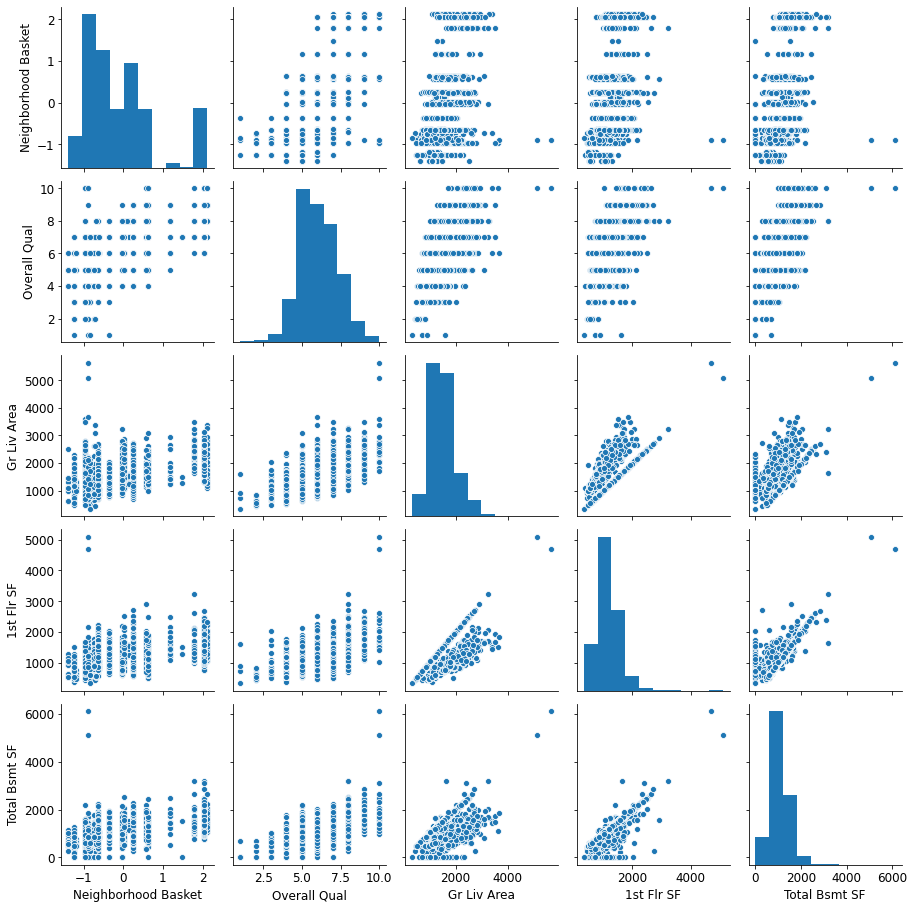

In [66]:
sns.pairplot(df_initial_list[df_ridge_coefs.names.iloc[:5]])
plt.savefig('../images/pair_plot_features with largest coefficients.png')

In [67]:
gs.score(X_train,y_train)

0.8232235590564405

In [68]:
gs.score(X_test,y_test)

0.8403813326846483

In [69]:
preds_test=gs.predict(X_test)

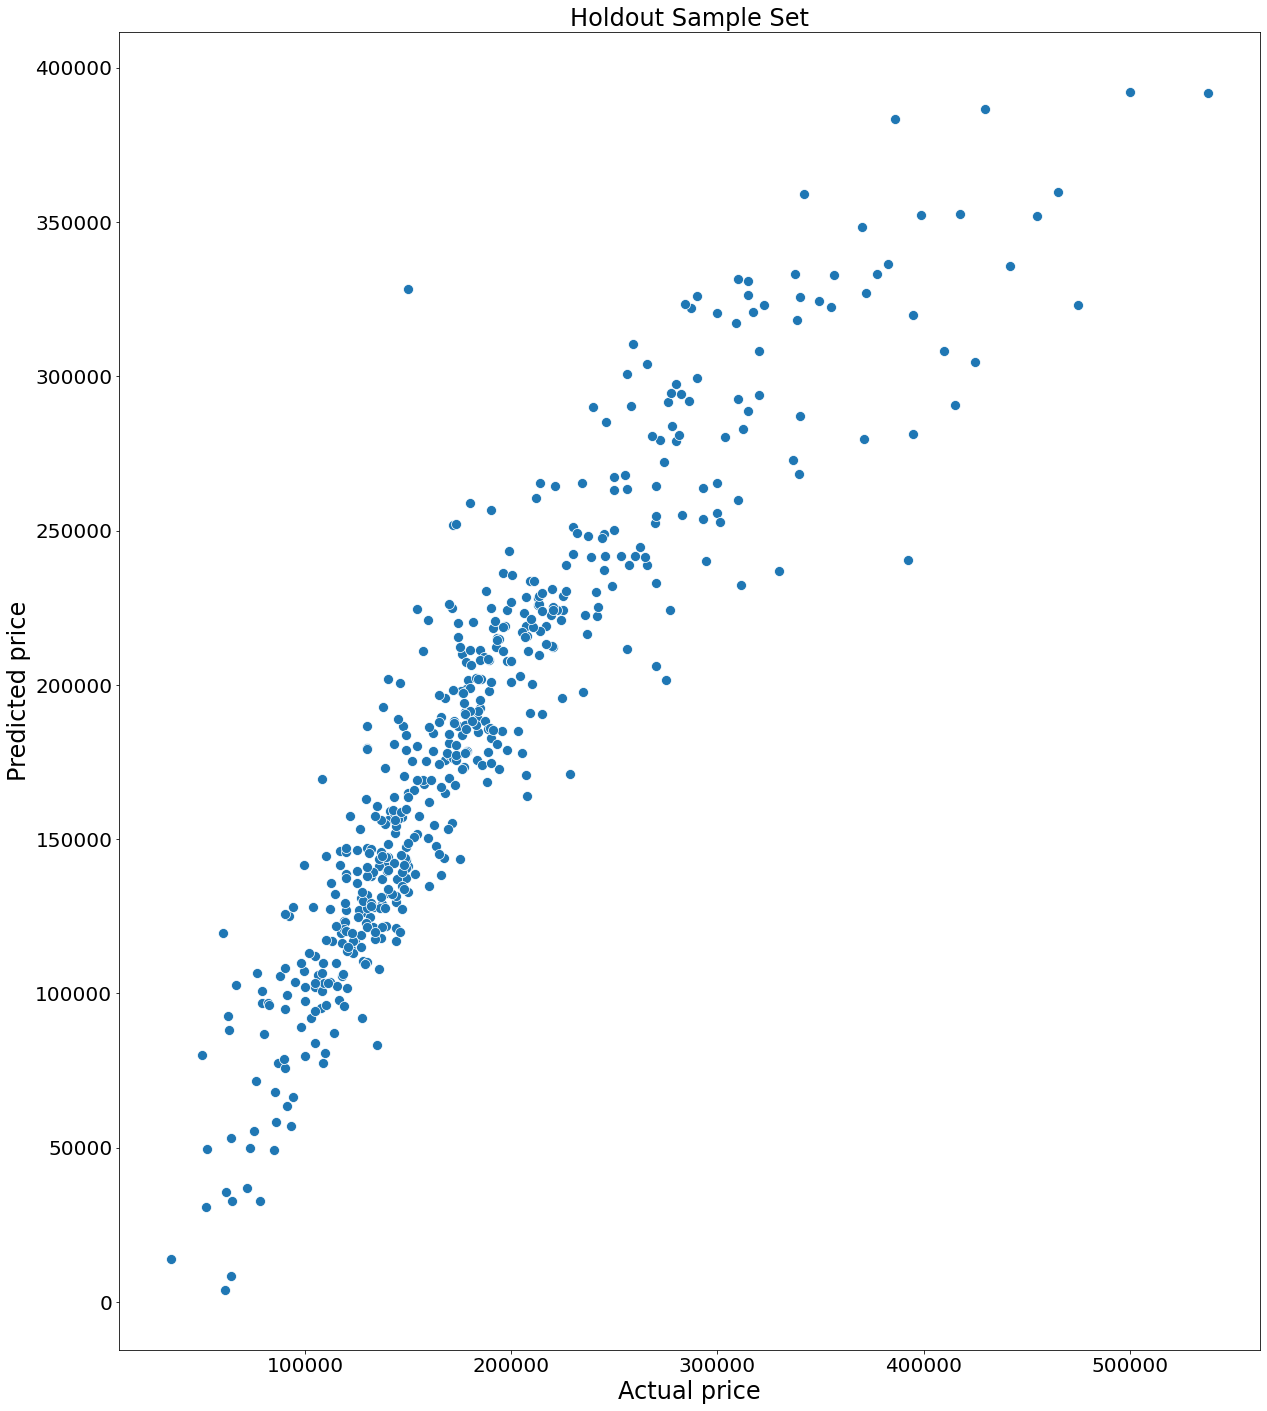

In [71]:
fig,ax=plt.subplots()
ax=sns.scatterplot(y_test,preds_test, s=100)
ax.axes.set_xlabel('Actual price',fontsize=24)
ax.axes.set_ylabel('Predicted price',fontsize=24)
ax.title.set_text('Holdout Sample Set')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../images/sscaler_ridge.png')

In [72]:
keyRegressionMetrics(y_test,preds_test)

explained_variance_score: 0.8403825223385673 
median_absolute_error: 15385.411661327627 
root_mean_squared_error: 32021.718932537635 
max_error: 178403.1666028885


Let's take a closer look at predicted values for training set.

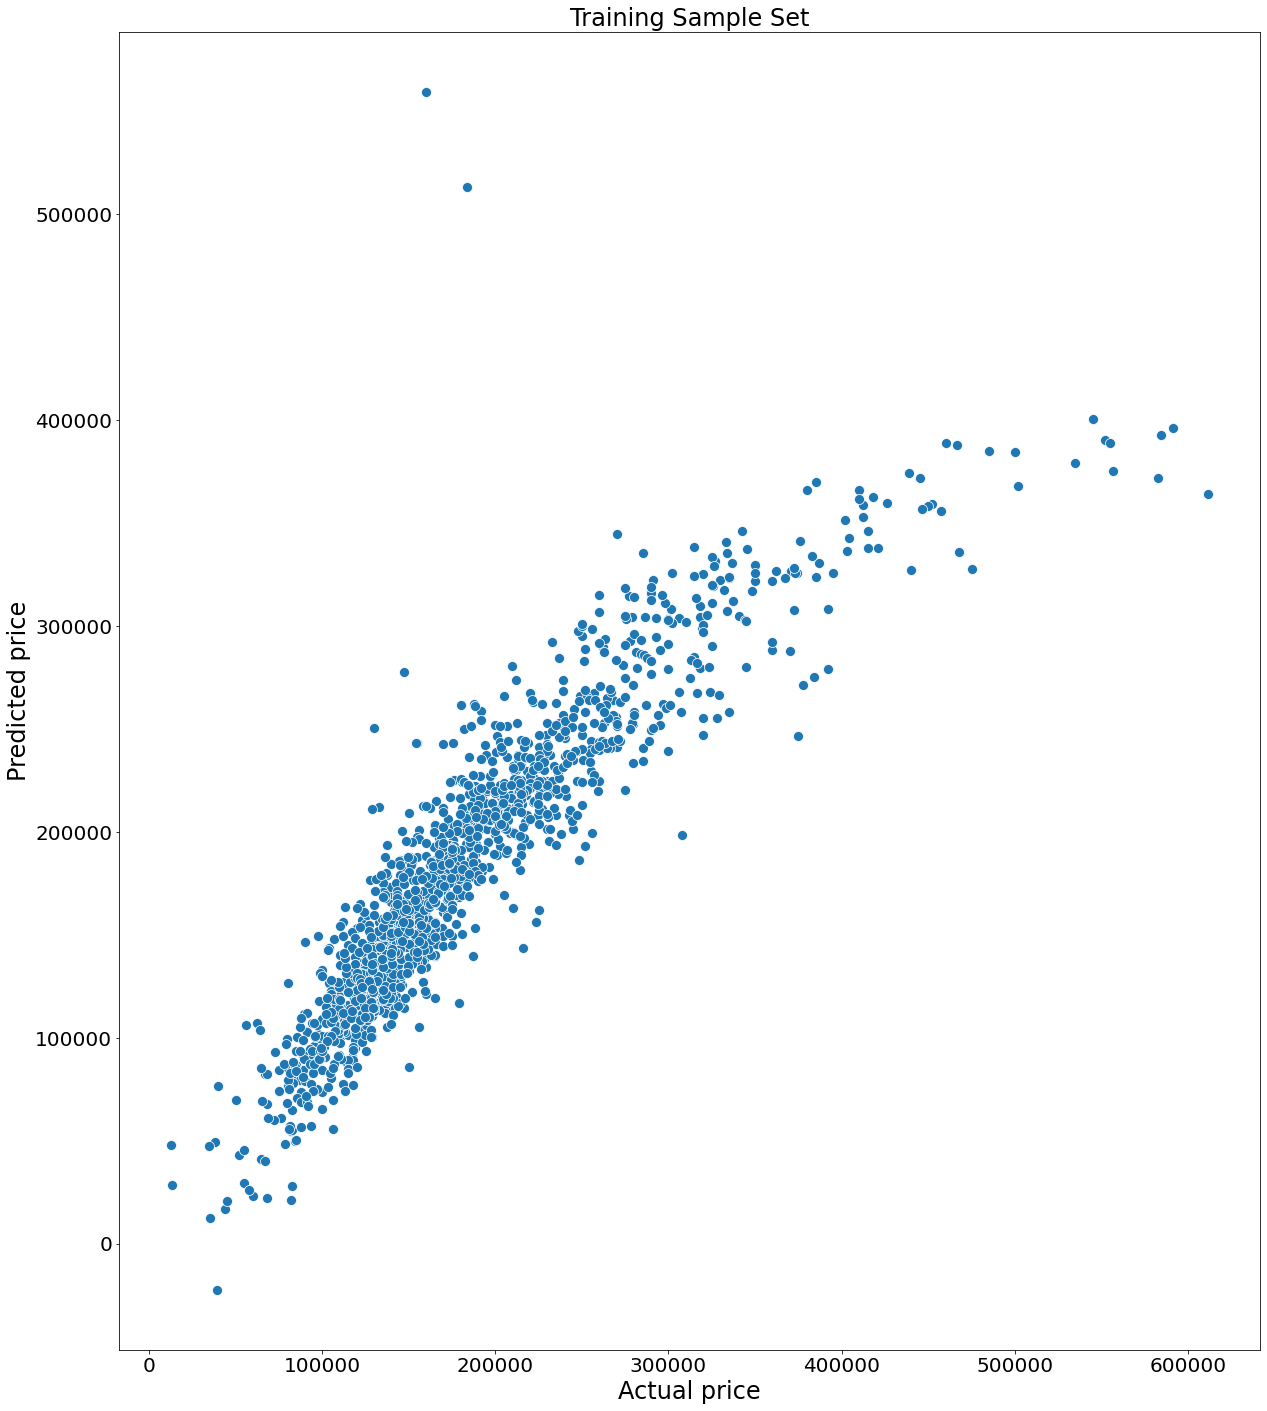

In [73]:
preds_train=gs.predict(X_train)
fig,ax=plt.subplots()
ax=sns.scatterplot(y_train,preds_train, s=100)
ax.axes.set_xlabel('Actual price',fontsize=24)
ax.axes.set_ylabel('Predicted price',fontsize=24)
ax.title.set_text('Training Sample Set')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../images/sscaler_ridge_preds_train.png')

One way to address this type of error (curved upwards) would be to fit a regression equation between log(y_train) and preds_train. So let's stage preds_train as X_second_stage and the natural logarithm of y_train as y_second_stage and fit a linear regression model.

In [74]:
second_stage=pd.DataFrame()
second_stage['X_second_stage']=preds_train
second_stage['y_second_stage']=np.log(np.array(y_train))

In [75]:
second_stage

X_second_stage  y_second_stage
0       49521.376698       10.542706
1      137593.169143       11.751942
2      267357.205494       12.456831
3      279417.072163       12.879017
4      217169.572613       12.220961
...              ...             ...
1531   201079.711523       12.128111
1532   287553.423388       12.479909
1533   159160.189862       11.831379
1534   177244.428909       12.165251
1535   266666.486803       12.703509

[1536 rows x 2 columns]

In [76]:
X2train, X2test, y2train, y2test=train_test_split(second_stage['X_second_stage'],second_stage['y_second_stage'],train_size=0.8)

In [77]:
lr=LinearRegression()

In [78]:
y2train

640     12.751300
1269    11.728843
497     12.352335
603     12.721886
847     12.813918
          ...    
1225    11.407565
1128    11.911702
327     11.320554
801     11.728037
931     11.863582
Name: y_second_stage, Length: 1228, dtype: float64

In [79]:
np.array(X2train) #,y2train

array([280294.58098622, 116315.71488775, 219134.76885943, ...,
        55296.40441059, 100668.47952102, 164272.70539712])

In [80]:
lr.fit(np.array(X2train).reshape(-1, 1),np.array(y2train))

LinearRegression()

In [81]:
lr.coef_

array([5.26652911e-06])

In [82]:
lr.intercept_

11.069678368073776

In [83]:
lr.score(np.array(X2test).reshape(-1, 1),np.array(y2test))

0.8744390031721476

In [84]:
preds2=lr.predict(np.array(X2test).reshape(-1, 1))

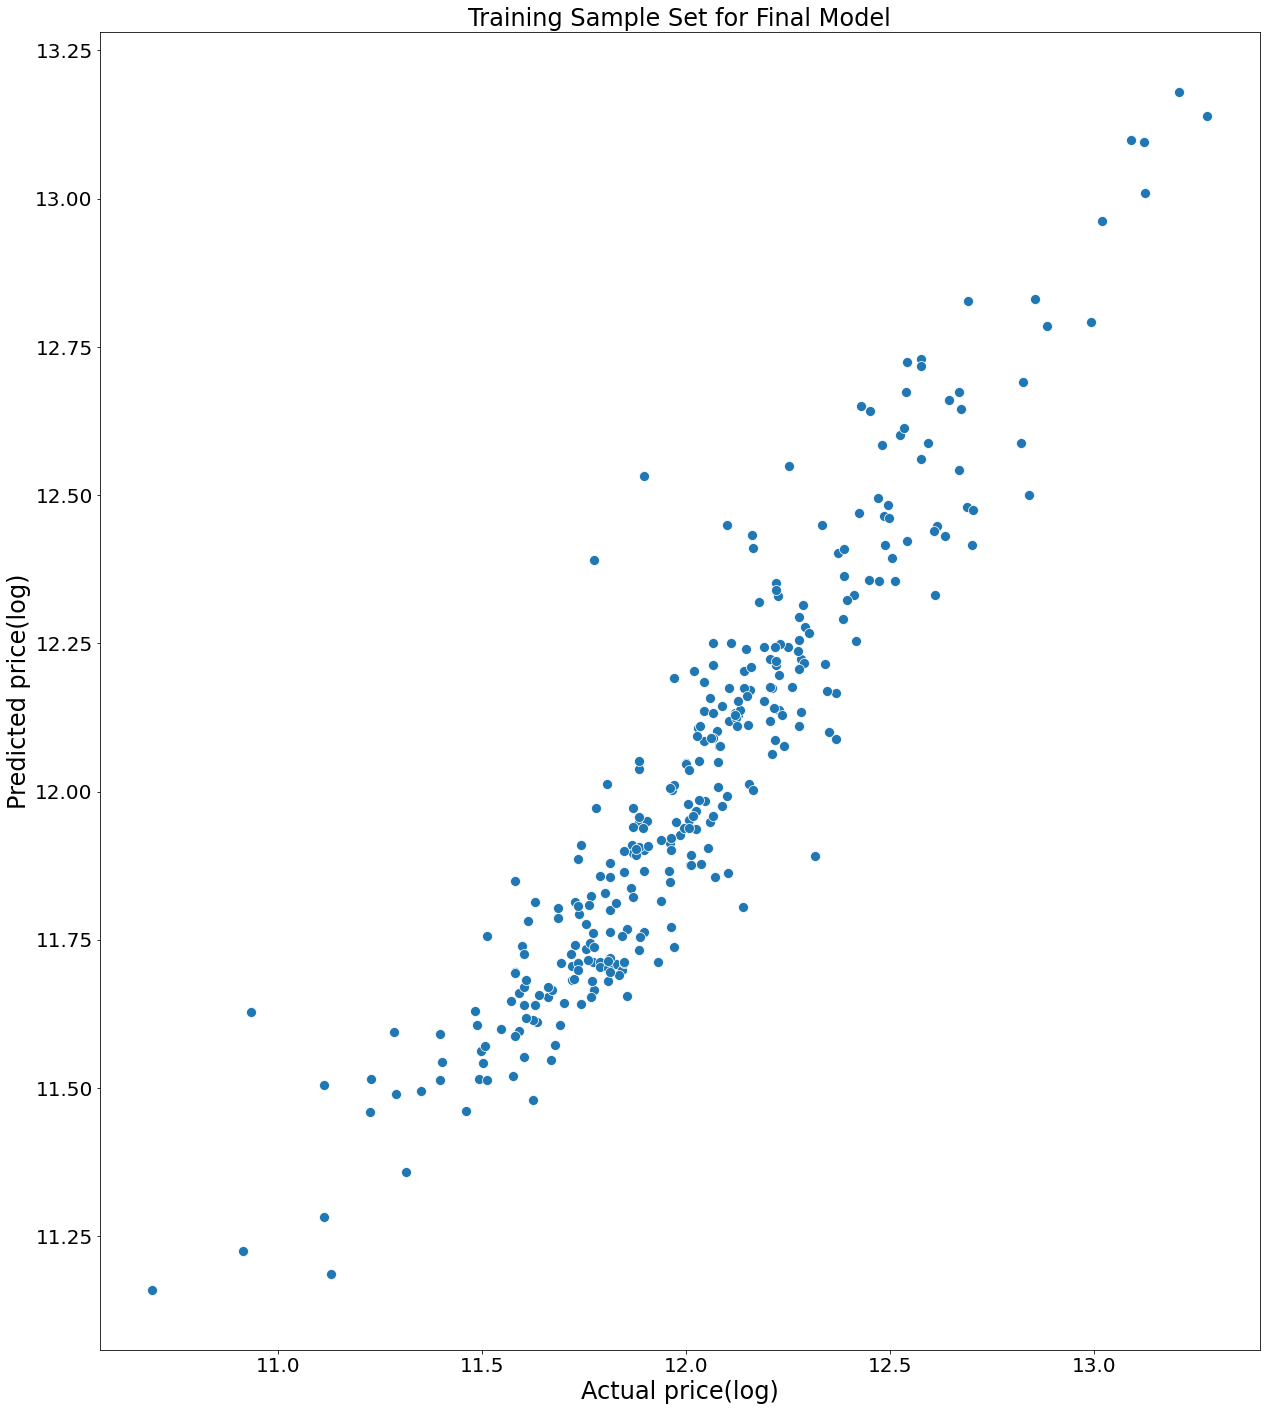

In [85]:
ax=sns.scatterplot(y2test,preds2,s=100)
ax.axes.set_xlabel('Actual price(log)',fontsize=24)
ax.axes.set_ylabel('Predicted price(log)',fontsize=24)
ax.title.set_text('Training Sample Set for Final Model')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()

plt.savefig('../images/predicting log values.png')

In [86]:
keyRegressionMetrics(y2test,preds2)

explained_variance_score: 0.8744397888623769 
median_absolute_error: 0.07333895838215376 
root_mean_squared_error: 0.14013802998184471 
max_error: 0.6957179607556814


In [87]:
second_stage_preds=np.exp(preds2)
second_stage_preds

array([180134.67642022, 148820.49152788, 136427.47939847, 217567.11597873,
       207840.70939899, 186781.94055758,  75014.65656149, 240373.37331439,
       255180.67287898, 168989.36490315, 138275.6429347 , 143881.37392009,
       223892.14201756, 281750.31040453, 143864.67740798, 144130.55976477,
       100728.66133279, 146113.98762123, 127477.23575322, 231486.80384274,
       232133.45790568, 161626.35728578, 486585.57283803, 171437.02455099,
       173427.70055106, 254671.80414066,  70224.83086674,  97637.59069769,
        94905.13875469, 113639.78796271, 171013.38195798, 446388.15282783,
       115172.58776167, 133214.32071591, 218412.14420573, 146730.75936942,
       154615.39005345, 113708.07717101, 336057.88973372, 196943.2828073 ,
       118425.8624634 , 112274.26176105, 170710.32502923, 113546.2967362 ,
       263048.31247431, 121701.23568713, 259227.82931587, 255025.95092027,
       116397.53169785, 208737.72993954, 199580.52458811, 120006.08237975,
       179894.80063203, 1

In [88]:
y2test

593     12.075394
66      11.867097
1038    11.767568
739     12.384219
1516    12.250090
          ...    
110     11.964001
983     11.694413
158     12.474190
862     12.031124
293     12.278393
Name: y_second_stage, Length: 308, dtype: float64

In [89]:
keyRegressionMetrics(np.exp(y2test),second_stage_preds)

explained_variance_score: 0.8903048241309854 
median_absolute_error: 11861.560534655 
root_mean_squared_error: 26543.310155639356 
max_error: 130156.54618476712


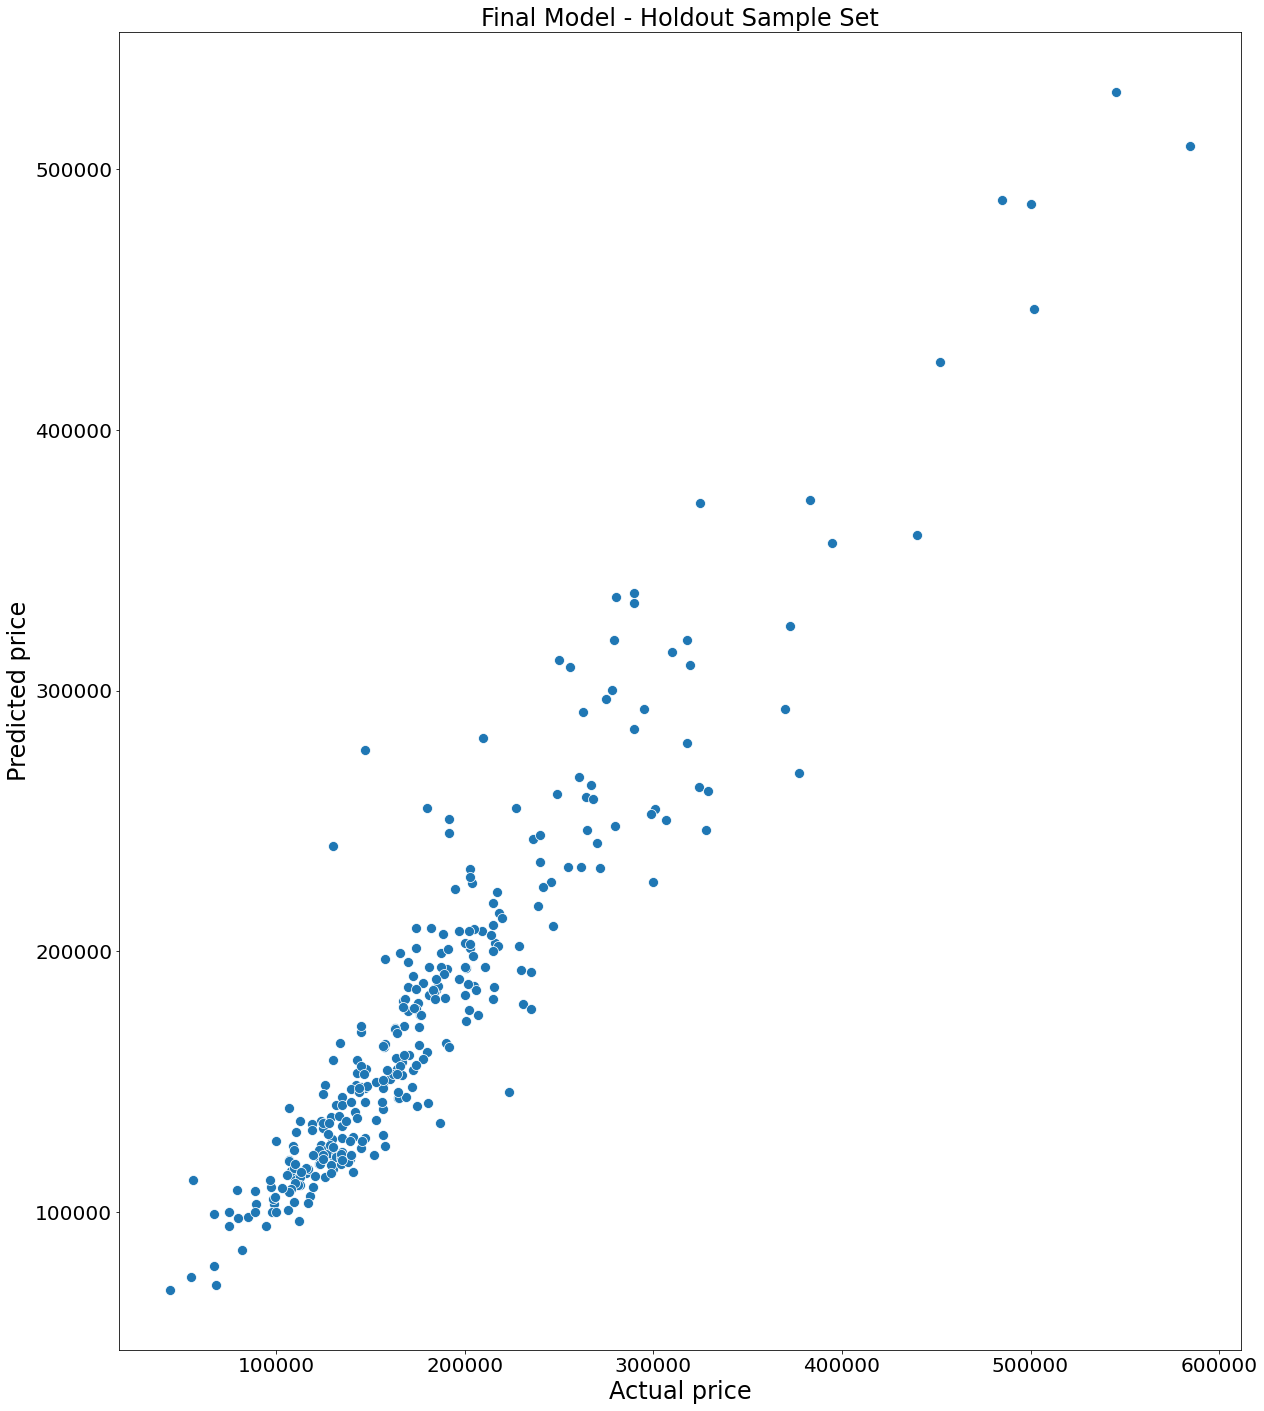

In [90]:
ax=sns.scatterplot(np.exp(y2test),second_stage_preds,s=100);
ax.axes.set_xlabel('Actual price',fontsize=24)
ax.axes.set_ylabel('Predicted price',fontsize=24)
ax.title.set_text('Final Model - Holdout Sample Set')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../images/test_set-Actual_vs_Predicted.png')

In [91]:
df=pd.read_csv('../datasets/test.csv')

In [92]:
test_data=df[['PID', 'Gr Liv Area', 'Lot Area','Screen Porch',\
       'Overall Qual', 'Overall Cond', 'Year Built', 'Total Bsmt SF',\
       '1st Flr SF', '2nd Flr SF', 'Bsmt Half Bath', 'Kitchen AbvGr',\
       'Garage Area', 'Garage Cars','Pool Area', 'Yr Sold', 'Enclosed Porch','Neighborhood']]

In [93]:
test_data['Porch']=test_data['Screen Porch']+test_data['Enclosed Porch']
test_data.drop(['Screen Porch','Enclosed Porch'],axis=1,inplace=True)

<ipython-input-93-a5a06e4962da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Porch']=test_data['Screen Porch']+test_data['Enclosed Porch']
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
test_data['Floor Space/Lot Area']=(test_data['1st Flr SF']+ test_data['2nd Flr SF'])/test_data['Lot Area']

<ipython-input-94-e8b4991a11fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Floor Space/Lot Area']=(test_data['1st Flr SF']+ test_data['2nd Flr SF'])/test_data['Lot Area']


In [95]:
test_data

PID  Gr Liv Area  Lot Area  Overall Qual  Overall Cond  Year Built  \
0    902301120         1928      9142             6             8        1910   
1    905108090         1967      9662             5             4        1977   
2    528218130         1496     17104             7             5        2006   
3    902207150          968      8520             5             6        1923   
4    535105100         1394      9500             6             5        1963   
..         ...          ...       ...           ...           ...         ...   
873  527377110         1877      8000             6             6        1974   
874  535126140         1988     14670             6             7        1966   
875  904100040         1211      8250             5             5        1968   
876  527425140          864      9000             4             6        1971   
877  535327160          925      8400             5             5        1955   

     Total Bsmt SF  1st Flr SF  2nd Flr SF  Bsmt Half Bath  Kitchen AbvGr  \
0             1020         908        1020               0              2   
1             1967        1967           0               0              2   
2              654         664         832               0              1   
3              968         968           0               0              1   
4             1394        1394           0               0              1   
..             ...         ...         ...             ...            ...   
873           1084        1084         793               0              1   
874           1104        1104         884               0              1   
875            952        1211           0               0              1   
876            864         864           0               0              1   
877            923         925           0               0              1   

     Garage Area  Garage Cars  Pool Area  Yr Sold Neighborhood  Porch  \
0            440            1          0     2006      OldTown    112   
1            580            2          0     2006       Sawyer      0   
2            426            2          0     2006      Gilbert      0   
3            480            2          0     2007      OldTown    184   
4            514            2          0     2009        NAmes    185   
..           ...          ...        ...      ...          ...    ...   
873          488            2          0     2007       NWAmes      0   
874          480            2          0     2008        NAmes      0   
875          322            1          0     2008       Sawyer      0   
876          528            2          0     2007        NAmes      0   
877          390            1          0     2007        NAmes      0   

     Floor Space/Lot Area  
0                0.210895  
1                0.203581  
2                0.087465  
3                0.113615  
4                0.146737  
..                    ...  
873              0.234625  
874              0.135515  
875              0.146788  
876              0.096000  
877              0.110119  

[878 rows x 18 columns]

In [96]:
test_data['Neighborhood Basket']=np.nan
for j in range(len(test_data['Neighborhood'])):
    test_data.iloc[j,18]=float(Z[test_data['Neighborhood'].iloc[j]])

<ipython-input-96-b601914e25e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Neighborhood Basket']=np.nan
/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [97]:
test_data.drop('Neighborhood', axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
test_data.columns

Index(['PID', 'Gr Liv Area', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Garage Area', 'Garage Cars',
       'Pool Area', 'Yr Sold', 'Porch', 'Floor Space/Lot Area',
       'Neighborhood Basket'],
      dtype='object')

In [99]:
test_data=test_data[X.columns]   #keeping only the features selected by the model

In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gr Liv Area          878 non-null    int64  
 1   Lot Area             878 non-null    int64  
 2   Overall Qual         878 non-null    int64  
 3   Overall Cond         878 non-null    int64  
 4   Year Built           878 non-null    int64  
 5   Total Bsmt SF        878 non-null    int64  
 6   1st Flr SF           878 non-null    int64  
 7   2nd Flr SF           878 non-null    int64  
 8   Kitchen AbvGr        878 non-null    int64  
 9   Garage Cars          878 non-null    int64  
 10  Garage Area          878 non-null    int64  
 11  Neighborhood Basket  878 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 82.4 KB


In [101]:
preds=gs.predict(test_data)
preds

array([149769.13012933, 170999.13711763, 191908.52617744, 114049.19326083,
       168432.34773976,  79637.38393273, 102302.77821819, 168800.46974677,
       216812.23988141, 173740.54037464, 174789.59763657, 127054.92873488,
       164641.14701784, 253915.94422738, 160399.25673499, 116872.73625569,
       138829.06141782, 115618.72810426, 190339.18835995, 197090.21350722,
       134211.01506951, 126284.35458446, 203609.14294996, 179252.71130393,
       200704.49573396, 141970.03240636, 121995.46277402, 122872.95987358,
       153010.06335682,  35381.29927002, 108752.07126494,  89002.02010361,
       237408.97516816, 161663.89863637, 221390.3429199 , 187695.36648908,
       117447.65441532, 102279.14013223, 115686.56972569, 219063.17398418,
       177894.43095363, 210878.49786531, 152151.10957617, 146741.67462819,
       225916.2709618 ,  79730.43753854, 218225.07854754, 126967.376064  ,
       120163.90083764, 116771.49765774, 107161.24560033, 215091.62566552,
       255742.91900037, 1

In [102]:
second_stage_X=preds

In [103]:
second_stage_X

array([149769.13012933, 170999.13711763, 191908.52617744, 114049.19326083,
       168432.34773976,  79637.38393273, 102302.77821819, 168800.46974677,
       216812.23988141, 173740.54037464, 174789.59763657, 127054.92873488,
       164641.14701784, 253915.94422738, 160399.25673499, 116872.73625569,
       138829.06141782, 115618.72810426, 190339.18835995, 197090.21350722,
       134211.01506951, 126284.35458446, 203609.14294996, 179252.71130393,
       200704.49573396, 141970.03240636, 121995.46277402, 122872.95987358,
       153010.06335682,  35381.29927002, 108752.07126494,  89002.02010361,
       237408.97516816, 161663.89863637, 221390.3429199 , 187695.36648908,
       117447.65441532, 102279.14013223, 115686.56972569, 219063.17398418,
       177894.43095363, 210878.49786531, 152151.10957617, 146741.67462819,
       225916.2709618 ,  79730.43753854, 218225.07854754, 126967.376064  ,
       120163.90083764, 116771.49765774, 107161.24560033, 215091.62566552,
       255742.91900037, 1

In [104]:
second_stage_preds=lr.predict(second_stage_X.reshape(-1, 1))

In [105]:
second_stage_preds

array([11.85844185, 11.9702503 , 12.08037021, 11.67032176, 11.95673223,
       11.48909097, 11.60845893, 11.95867096, 12.21152634, 11.98468798,
       11.99021287, 11.73881685, 11.93676576, 12.40693408, 11.91442572,
       11.68519204, 11.80082566, 11.67858777, 12.07210524, 12.10765971,
       11.77650459, 11.7347586 , 12.14199185, 12.01371799, 12.12669444,
       11.81736768, 11.71217102, 11.71679239, 11.87551032, 11.25601501,
       11.64242432, 11.5384101 , 12.31999965, 11.921086  , 12.23563705,
       12.05818148, 11.68821986, 11.60833444, 11.67894505, 12.22338095,
       12.00656457, 12.18027612, 11.87098662, 11.84249767, 12.25947299,
       11.48958104, 12.2189671 , 11.73835575, 11.70252505, 11.68465886,
       11.63404619, 12.20246468, 12.4165559 , 11.65478275, 11.59182217,
       11.90082717, 11.97386829, 11.80252713, 12.05837309, 12.30171846,
       12.75629872, 11.71644312, 11.77029434, 12.13612877, 12.01338571,
       12.75267358, 11.47116013, 12.30994814, 11.32140976, 11.89

In [106]:
price_estimate=np.exp(second_stage_preds)

In [107]:
price_estimate

array([141271.92403528, 157984.19907271, 176375.44412997, 117045.93740568,
       155862.9275099 ,  97644.73019944, 110024.56382936, 156165.39601229,
       201093.71866114, 160281.66955552, 161169.65900946, 125343.95137906,
       152781.75760885, 244491.07381625, 149406.44986906, 118799.44753142,
       133362.4196573 , 118017.4489602 , 174923.71506554, 181254.91949737,
       130158.02726481, 124836.30491399, 187585.84245822, 165002.84412182,
       184738.10214024, 135586.85038164, 122048.16291609, 122613.49720615,
       143703.91566074,  77343.74685764, 113825.7804709 , 102581.21421311,
       224134.0627627 , 150404.85881818, 206001.15473835, 172504.99630432,
       119159.69636713, 110010.86765047, 118059.62293339, 203491.79229382,
       163826.72065102, 194906.67150766, 143055.30968344, 139037.32049619,
       210970.37189831,  97692.59463334, 202595.58854119, 125286.16877008,
       120876.54924126, 118736.12339741, 112876.11707901, 199279.70617838,
       246854.87569509, 1

Let's check the distribution of the data provided for competetion with that of the predictions.

In [108]:
pd.DataFrame(price_estimate)

0
0    141271.924035
1    157984.199073
2    176375.444130
3    117045.937406
4    155862.927510
..             ...
873  186067.346898
874  181965.577326
875  124783.899358
876  115588.707254
877  115845.462352

[878 rows x 1 columns]

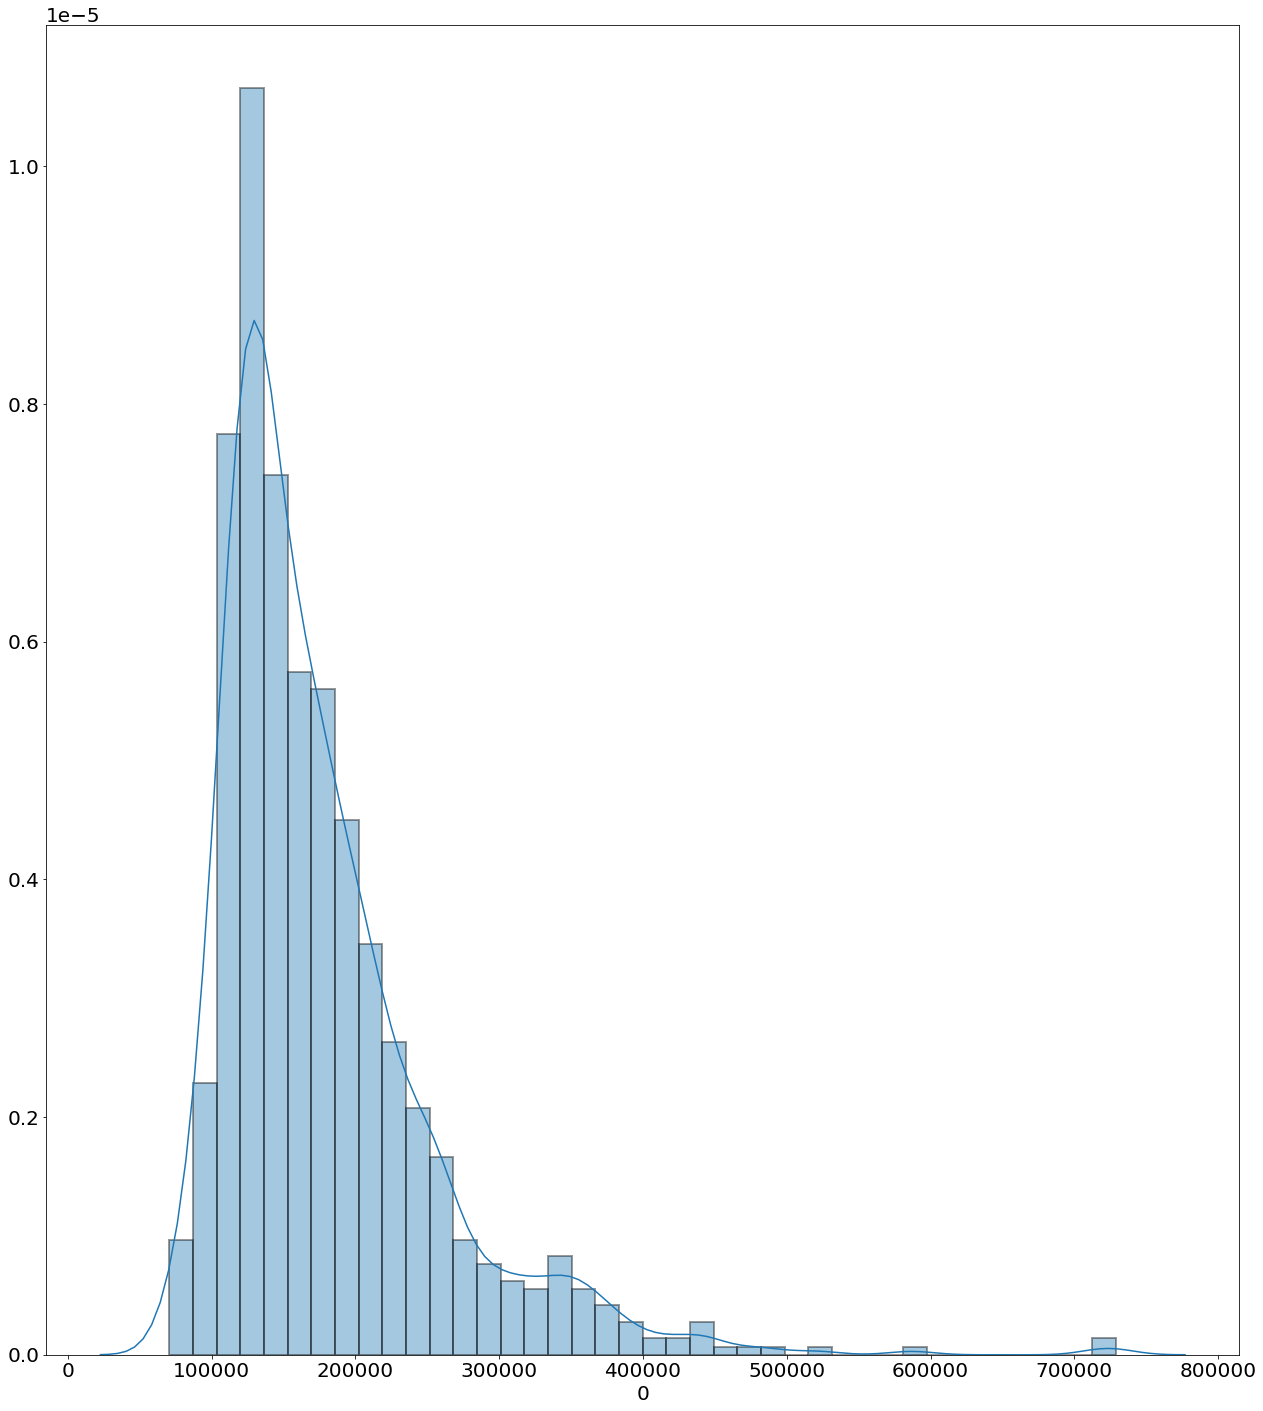

In [111]:
sns.distplot(pd.DataFrame(price_estimate)[0],hist_kws=dict(edgecolor="k", linewidth=2))
ax.axes.set_xlabel('Estimated price($)',fontsize=24)
ax.title.set_text('Kaggle Test Set')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../images/hist_estimated_price.png')

In [112]:
pd.DataFrame(price_estimate).describe()

0
count     878.000000
mean   177327.476805
std     76006.254842
min     70641.938959
25%    126053.961500
50%    157171.092614
75%    204960.425638
max    729103.743890

In [113]:
df_initial_list[['SalePrice']].describe()

SalePrice
count    2048.000000
mean   181484.252441
std     79248.657891
min     12789.000000
25%    129837.500000
50%    162500.000000
75%    214000.000000
max    611657.000000

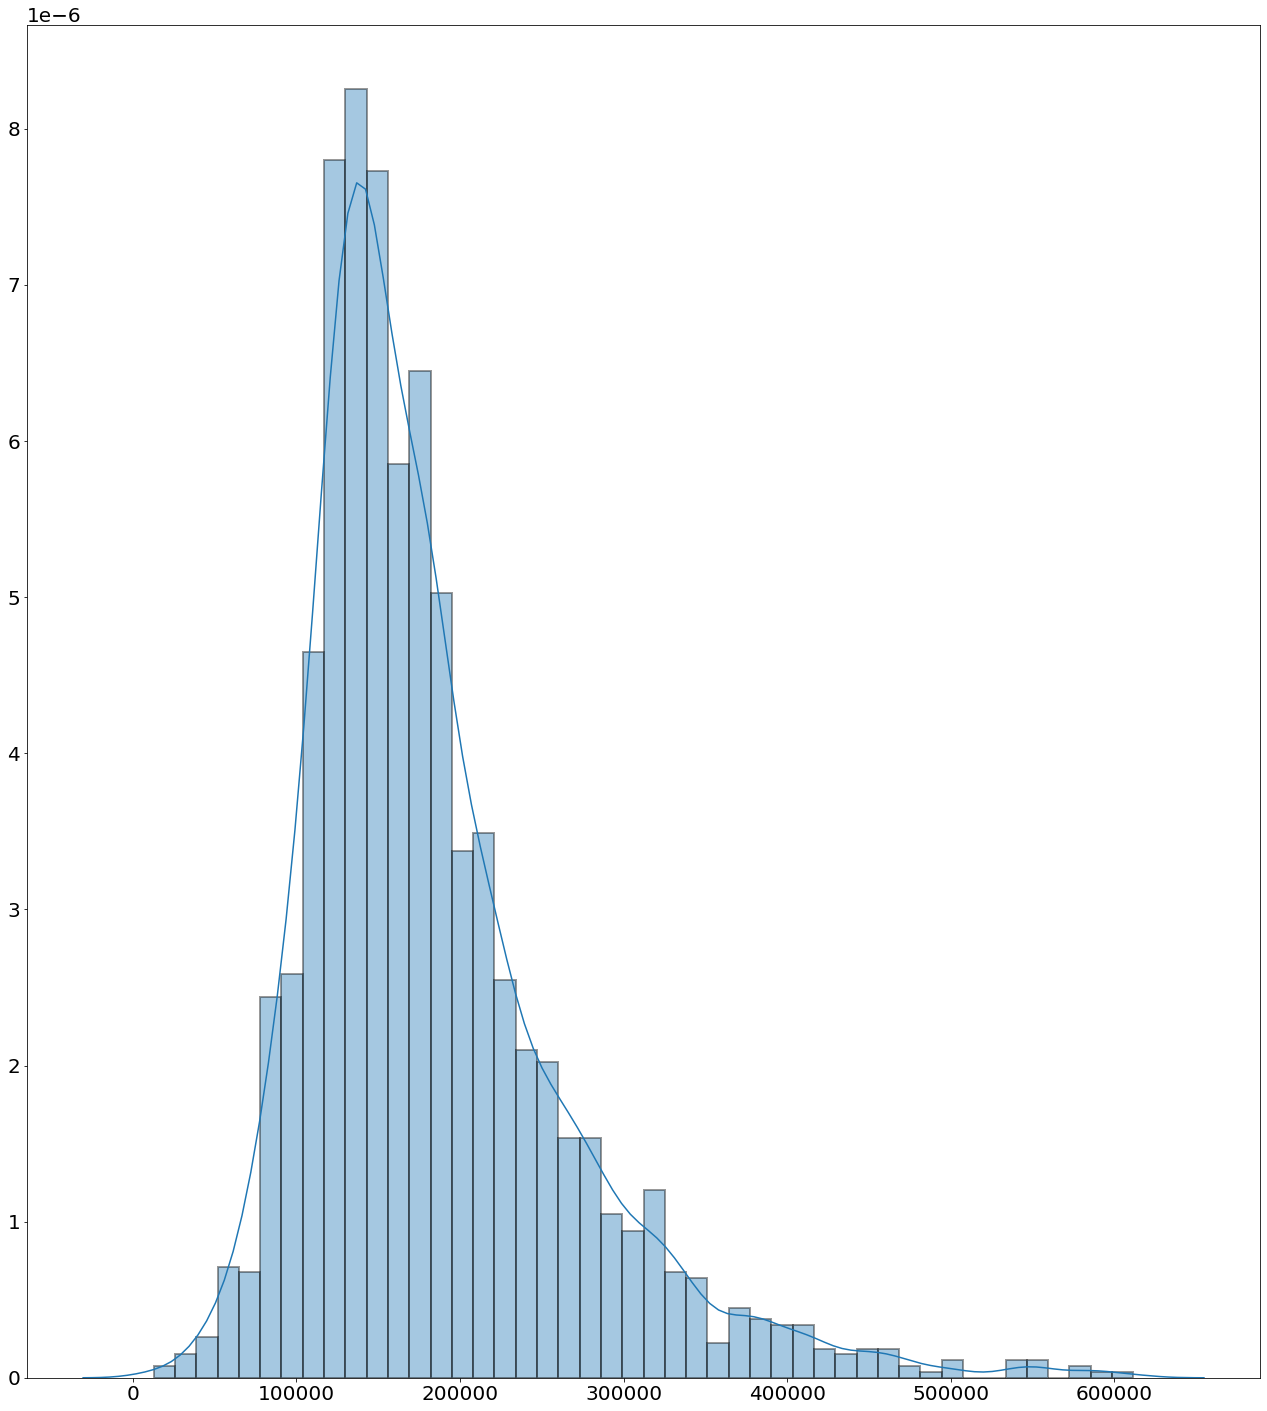

In [115]:
sns.distplot(df_initial_list[['SalePrice']],hist_kws=dict(edgecolor="k", linewidth=2));
ax.axes.set_xlabel('Actual Price($)',fontsize=24)
ax.title.set_text('Kaggle Training Set')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('../images/hist_SalePrice.png')